# Flagellin database description - phylosignal on sequence length

### Load libraries

In [2]:
library(seqinr)
library(tidyverse)
library(ape)
library(phyloseq)
library(phylosignal)
library(picante)
library(phylosignal)
library(phytools)
library(phangorn)
library(gridExtra)
library(ggtree)
library(phylotools)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::count()  masks seqinr::count()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following objects are masked from ‘package:seqinr’:

    as.alignment, consensus


Loading required package: vegan

Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘pa

In [3]:
library(ggsci)

### Import flagellin sequences

In [4]:
flagellins.markers.sb=seqinr::read.fasta("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/out.finalmap.faa",seqtype="AA")

In [5]:
#Get HVR length across sequences
length.seqs=as_tibble(getName(flagellins.markers.sb))%>%
            mutate(length=getLength(flagellins.markers.sb))%>%
            mutate(HVR_length=length-240)%>%
            rename(Accession="value")

In [6]:
head(length.seqs)

Accession      length HVR_length
1 WP_088222031.1 483    243       
2 PEB57461.1     285     45       
3 OQU41310.1     284     44       
4 WP_108001953.1 414    174       
5 WP_075123400.1 391    151       
6 CUH95360.1     467    227

In [19]:
flagellins.full.db = seqinr::read.fasta("../flagellin_phylogeny/curatedFlagellin.db_24915seqs.fasta")

In [20]:
length.seqs.full.db=as_tibble(getName(flagellins.full.db))%>%
            mutate(seqLength=getLength(flagellins.full.db))%>%
            #mutate(HVR_length=length-240)%>%
            rename(Accession="value")

### Add taxonomy + GTDB metadata to flagellin sequences

In [213]:
taxonomy.full.db=read_tsv("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/flagellin_phylogeny/taxonomy.gtdb.full.db.txt")%>%
separate(gtdb_taxonomy,into=c("Domain","Phylum","Class","Order","Family","Genus","Species"),sep=";")

Rows: 26392 Columns: 117
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (73): Accession, ncbi_phylum, ncbi_class, ncbi_order, ncbi_family, ncbi...
dbl  (37): ncbi_taxid, ambiguous_bases, checkm_completeness, checkm_contamin...
lgl   (5): gtdb_representative, gtdb_type_species_of_genus, mimag_high_quali...
date  (2): ncbi_date, ncbi_seq_rel_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [216]:
full.db.taxonomy.length=inner_join(length.seqs.full.db,taxonomy.full.db,by="Accession")%>%
select(c(contains(c("genome","assembly")),"Accession","seqLength","ncbi_taxid","ncbi_phylum","genome_size","Domain","Phylum","Class","Order","Family","Genus","Species"))

In [217]:
count_phylum.full.db = count(full.db.taxonomy.length,Phylum,sort=TRUE)

In [218]:
sd(count_phylum.full.db$n)

[1] 2505.184

In [219]:
mean(count_phylum.full.db$n)

[1] 622.875

In [146]:
count.taxonomy.fulldb = count(full.db.taxonomy.length,Species,Genus,Family,Order,Class,Phylum,sort=TRUE)

In [118]:
head(count.taxonomy.fulldb)

Species                    Genus              Family               
1 s__Escherichia coli_D      g__Escherichia     f__Enterobacteriaceae
2 s__Campylobacter_D jejuni  g__Campylobacter_D f__Campylobacteraceae
3 s__Salmonella enterica     g__Salmonella      f__Enterobacteriaceae
4 s__Bacillus_A cereus       g__Bacillus_A      f__Bacillaceae_G     
5 s__Campylobacter_D coli    g__Campylobacter_D f__Campylobacteraceae
6 s__Vibrio parahaemolyticus g__Vibrio          f__Vibrionaceae      
  Order                Phylum              n  
1 o__Enterobacterales  p__Proteobacteria   737
2 o__Campylobacterales p__Campylobacterota 718
3 o__Enterobacterales  p__Proteobacteria   622
4 o__Bacillales        p__Firmicutes       431
5 o__Campylobacterales p__Campylobacterota 392
6 o__Enterobacterales  p__Proteobacteria   372

In [126]:
nrow(full.db.taxonomy.length)

[1] 24915

In [284]:
names(taxonomy.full.db)

[1] "Accession"                         "ncbi_taxid"                       
  [3] "ncbi_phylum"                       "ncbi_class"                       
  [5] "ncbi_order"                        "ncbi_family"                      
  [7] "ncbi_genus"                        "ncbi_species"                     
  [9] "accession"                         "ambiguous_bases"                  
 [11] "checkm_completeness"               "checkm_contamination"             
 [13] "checkm_marker_count"               "checkm_marker_lineage"            
 [15] "checkm_marker_set_count"           "checkm_strain_heterogeneity"      
 [17] "coding_bases"                      "coding_density"                   
 [19] "contig_count"                      "gc_count"                         
 [21] "gc_percentage"                     "genome_size"                      
 [23] "gtdb_genome_representative"        "gtdb_representative"              
 [25] "Domain"                            "Phylum"                           
 [27] "Class"                             "Order"                            
 [29] "Family"                            "Genus"                            
 [31] "Species"                           "gtdb_type_designation"            
 [33] "gtdb_type_designation_sources"     "gtdb_type_species_of_genus"       
 [35] "l50_contigs"                       "l50_scaffolds"                    
 [37] "longest_contig"                    "longest_scaffold"                 
 [39] "lsu_23s_contig_len"                "lsu_23s_count"                    
 [41] "lsu_23s_length"                    "lsu_23s_query_id"                 
 [43] "lsu_5s_contig_len"                 "lsu_5s_count"                     
 [45] "lsu_5s_length"                     "lsu_5s_query_id"                  
 [47] "lsu_silva_23s_blast_align_len"     "lsu_silva_23s_blast_bitscore"     
 [49] "lsu_silva_23s_blast_evalue"        "lsu_silva_23s_blast_perc_identity"
 [51] "lsu_silva_23s_blast_subject_id"    "lsu_silva_23s_taxonomy"           
 [53] "mean_contig_length"                "mean_scaffold_length"             
 [55] "mimag_high_quality"                "mimag_low_quality"                
 [57] "mimag_medium_quality"              "n50_contigs"                      
 [59] "n50_scaffolds"                     "ncbi_assembly_level"              
 [61] "ncbi_assembly_name"                "ncbi_assembly_type"               
 [63] "ncbi_bioproject"                   "ncbi_biosample"                   
 [65] "ncbi_contig_count"                 "ncbi_contig_n50"                  
 [67] "ncbi_country"                      "ncbi_date"                        
 [69] "ncbi_genbank_assembly_accession"   "ncbi_genome_category"             
 [71] "ncbi_genome_representation"        "ncbi_isolate"                     
 [73] "ncbi_isolation_source"             "ncbi_lat_lon"                     
 [75] "ncbi_molecule_count"               "ncbi_ncrna_count"                 
 [77] "ncbi_organism_name"                "ncbi_protein_count"               
 [79] "ncbi_refseq_category"              "ncbi_rrna_count"                  
 [81] "ncbi_scaffold_count"               "ncbi_scaffold_l50"                
 [83] "ncbi_scaffold_n50"                 "ncbi_scaffold_n75"                
 [85] "ncbi_scaffold_n90"                 "ncbi_seq_rel_date"                
 [87] "ncbi_spanned_gaps"                 "ncbi_species_taxid"               
 [89] "ncbi_ssu_count"                    "ncbi_strain_identifiers"          
 [91] "ncbi_submitter"                    "ncbi_taxonomy"                    
 [93] "ncbi_taxonomy_unfiltered"          "ncbi_total_gap_length"            
 [95] "ncbi_total_length"                 "ncbi_translation_table"           
 [97] "ncbi_trna_count"                   "ncbi_type_material_designation"   
 [99] "ncbi_ungapped_length"              "ncbi_unspanned_gaps"              
[101] "ncbi_wgs_master"                   "protein_count"                    
[103] "scaffold_count"  

In [293]:
genome.acc=count(taxonomy.full.db,accession,sort=TRUE)

In [286]:
nrow(count(taxonomy.full.db,gtdb_genome_representative))

[1] 9132

### Per taxonomic rank summary

In [321]:
stats.full.db = data.frame (rank = c("Phylum","Class","Order","Family","Genus","Species"),
           number = c(61,131,290,562,1905,6428),
           total.gtdb = c(161,488,1624,4264,19153,80789))
stats.full.db 

rank    number total.gtdb
1 Phylum    61     161     
2 Class    131     488     
3 Order    290    1624     
4 Family   562    4264     
5 Genus   1905   19153     
6 Species 6428   80789

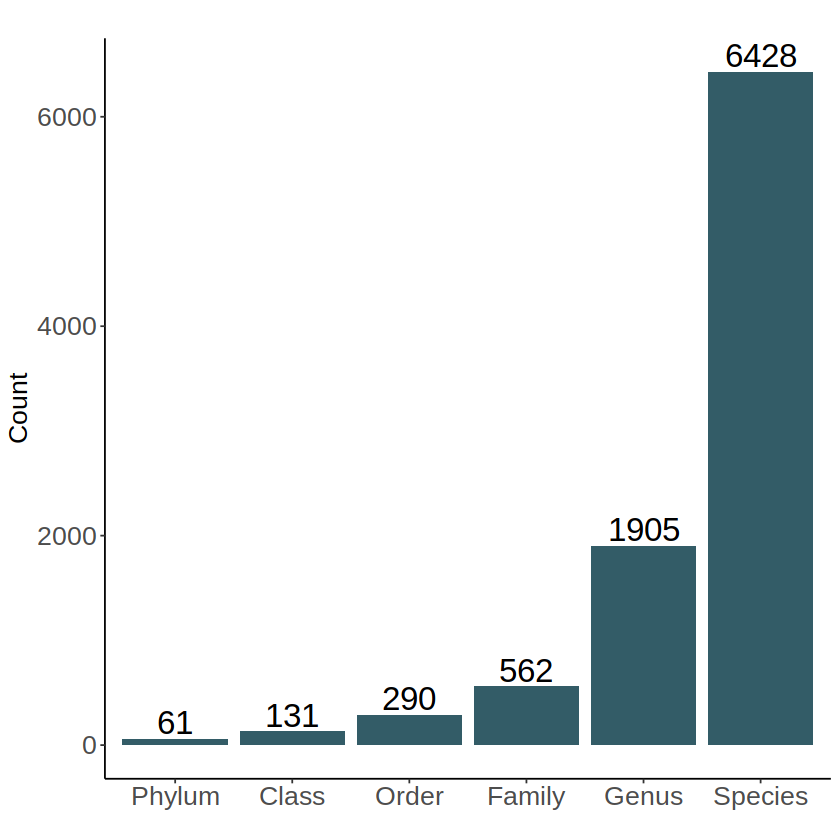

In [423]:
ggplot(data=stats.full.db,aes(x=reorder(rank,number),y=number))+
geom_bar(stat="identity",alpha=1,fill="#335c67")+
geom_text(aes(label = number), vjust = -0.2,size=7) +
labs(x="",y="Count")+
theme_classic()+
ggtitle("")+
theme(axis.text.x= element_text(size=16),
      axis.text.y=element_text(size=16),
      axis.title.y = element_text(size=16),
      legend.title = element_text(size=12)
                             )

In [323]:
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked _by_ ‘.GlobalEnv’:

    tips


The following object is masked from ‘package:tidyr’:

    smiths




In [334]:
melt.stats.full.db = melt(stats.full.db)
names(melt.stats.full.db)

Using rank as id variables



[1] "rank"     "variable" "value"

Warning message:
“Ignoring unknown parameters: positon”


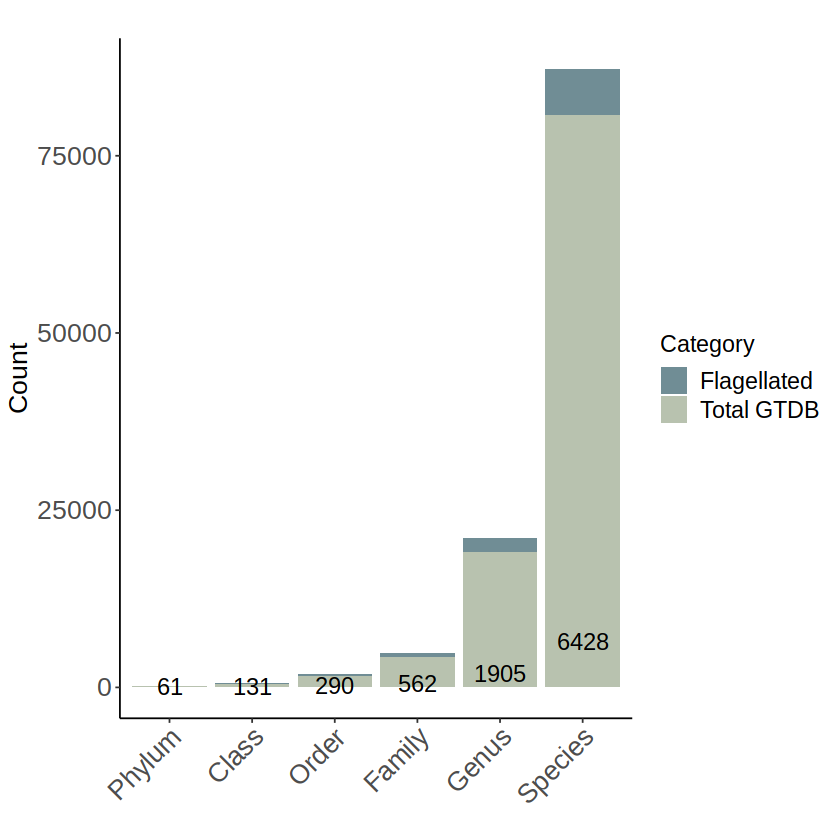

In [418]:
ggplot(data=melt.stats.full.db,aes(x=reorder(rank,value),y=value,fill=variable))+
geom_bar(stat="identity",positon="stack",alpha=0.7)+
#geom_text(aes(label = value), vjust = -0.2,size=5) +
labs(x="",y="Count")+
theme_classic()+
ggtitle("")+
theme(axis.text.x= element_text(size=16,angle=45,hjust=1),
      axis.text.y=element_text(size=16),
      axis.title.y = element_text(size=16),
      legend.title = element_text(size=14),
      legend.text = element_text(size=14))+
scale_fill_manual(values = c("number"="#335c67","total.gtdb"="#99a88c"),
                       name = "Category",
                       labels = c("Flagellated","Total GTDB"))+
geom_text(data=filter(melt.stats.full.db,variable%in%"number"),aes(label = value), size=5)

In [356]:
prop.stats.full.db = transform(melt.stats.full.db,prop=value/tapply(value,rank,sum)[rank])

In [374]:
prop.stats.full.db

rank    variable   value prop      
1  Phylum  number        61 0.27477477
2  Class   number       131 0.21163166
3  Order   number       290 0.15151515
4  Family  number       562 0.11645255
5  Genus   number      1905 0.09046443
6  Species number      6428 0.07370123
7  Phylum  total.gtdb   161 0.72522523
8  Class   total.gtdb   488 0.78836834
9  Order   total.gtdb  1624 0.84848485
10 Family  total.gtdb  4264 0.88354745
11 Genus   total.gtdb 19153 0.90953557
12 Species total.gtdb 80789 0.92629877

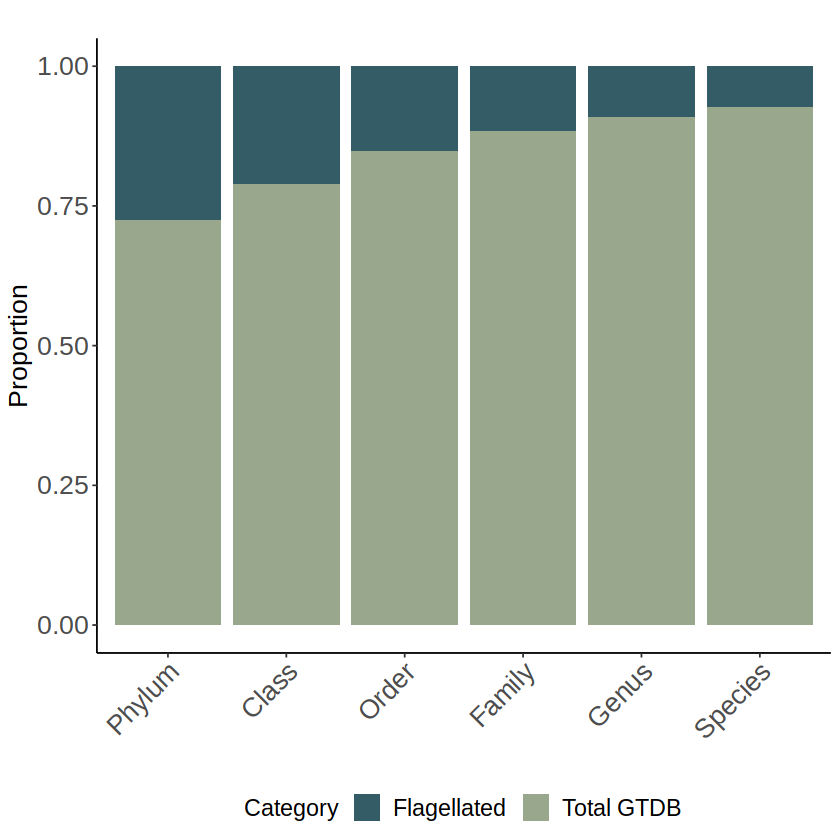

In [430]:
ggplot(data=prop.stats.full.db,aes(x=reorder(rank,value),y=prop,fill=variable))+
geom_bar(stat="identity",position="stack")+
labs(x="",y="Proportion")+
theme_classic()+
ggtitle("")+
theme(axis.text.x= element_text(size=16,angle=45,hjust=1),
      axis.text.y=element_text(size=16),
      axis.title.y = element_text(size=16),
      legend.title = element_text(size=14),
      legend.text = element_text(size=14),
     legend.position = "bottom")+
      scale_fill_manual(values = c("number"="#335c67","total.gtdb"="#99a88c"),
                       name = "Category",
                       labels = c("Flagellated","Total GTDB"))
#geom_text(data=filter(prop.stats.full.db,variable%in%"number"),aes(label = prop), size=5)
                             

### Top 10% flagellins

In [203]:
sorted.phylum = count(full.db.taxonomy.length,Family,Phylum,sort=TRUE)

Selecting by n


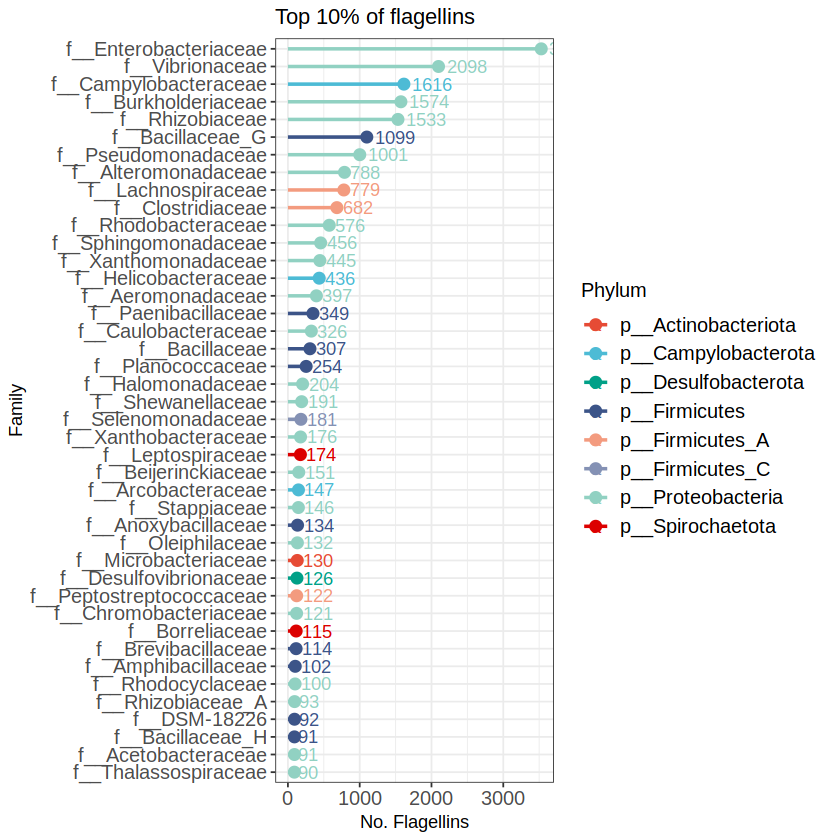

In [208]:
ggplot(filter(sorted.phylum) %>% top_frac(0.1),
                          aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        geom_text(aes(label = n), hjust = -0.2) +
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 10% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

### Top 5% flagellins

In [419]:
top5.full = filter(sorted.phylum) %>% top_frac(0.05)

Selecting by n


In [420]:
sum(top5.full$n)

[1] 18640

In [421]:
sum(sorted.phylum$n)

[1] 24915

In [422]:
18640/24915

[1] 0.7481437

Selecting by n


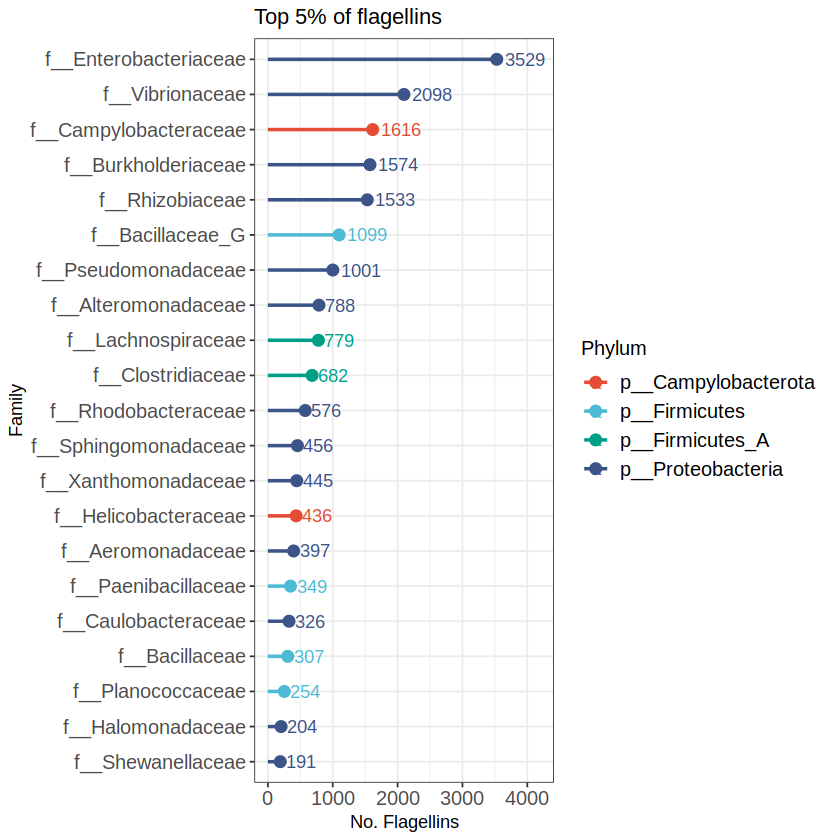

In [212]:
ggplot(filter(sorted.phylum) %>% top_frac(0.05),
                          aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        geom_text(aes(label = n), hjust = -0.2) +
                        xlim(c(0,4200))+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 5% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

### Top 3% flagellins

Selecting by n


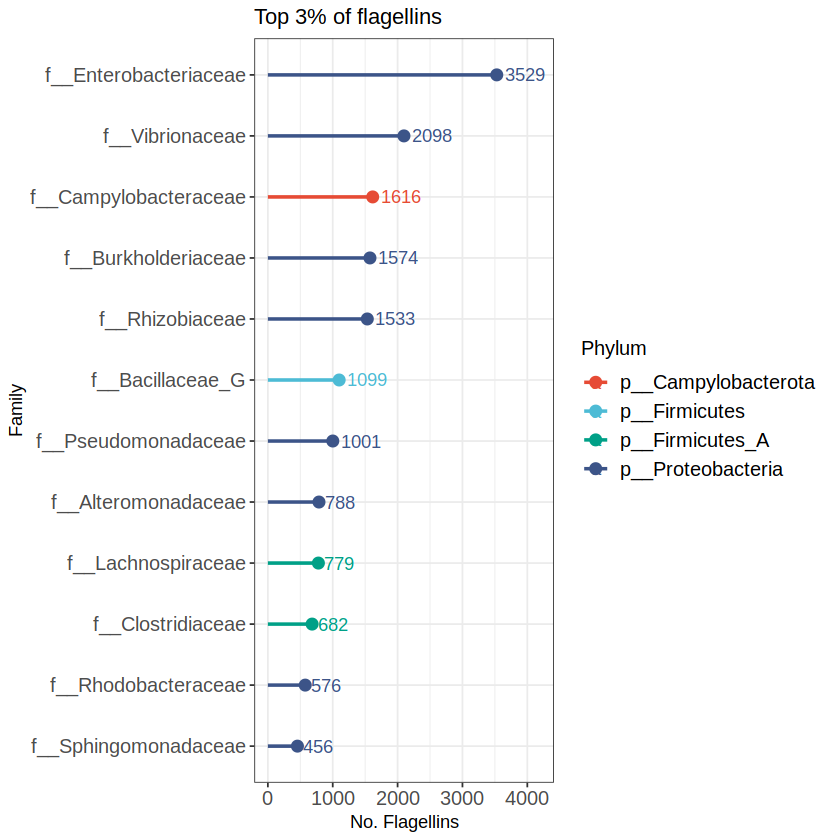

In [211]:
ggplot(filter(sorted.phylum) %>% top_frac(0.03),
                          aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        geom_text(aes(label = n), hjust = -0.2) +
                        xlim(c(0,4200))+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 3% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

In [137]:
#Subset Proteobacteria
subset.proteo = filter(full.db.taxonomy.length,Phylum%in%"p__Proteobacteria")
#Subset Firmicutes_A
subset.firm_a = filter(full.db.taxonomy.length,Phylum%in%"p__Firmicutes_A")
#Subset Firmicutes
subset.firm = filter(full.db.taxonomy.length,Phylum%in%"p__Firmicutes")
#Subset Desulfobacterota
subset.desulf = filter(full.db.taxonomy.length,Phylum%in%"p__Desulfobacterota")
#Subset Campylobacterota
subset.campy = filter(full.db.taxonomy.length,Phylum%in%"p__Campylobacterota")
#Subset Actinobacteriota
susbet.actino = filter(full.db.taxonomy.length,Phylum%in%"p__Actinobacteriota")

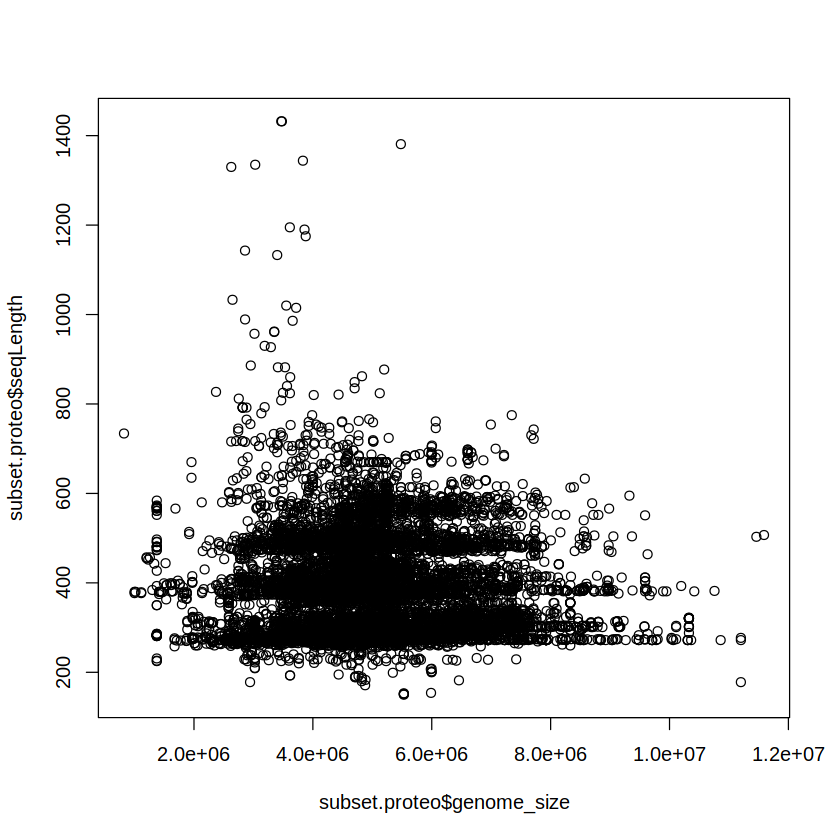

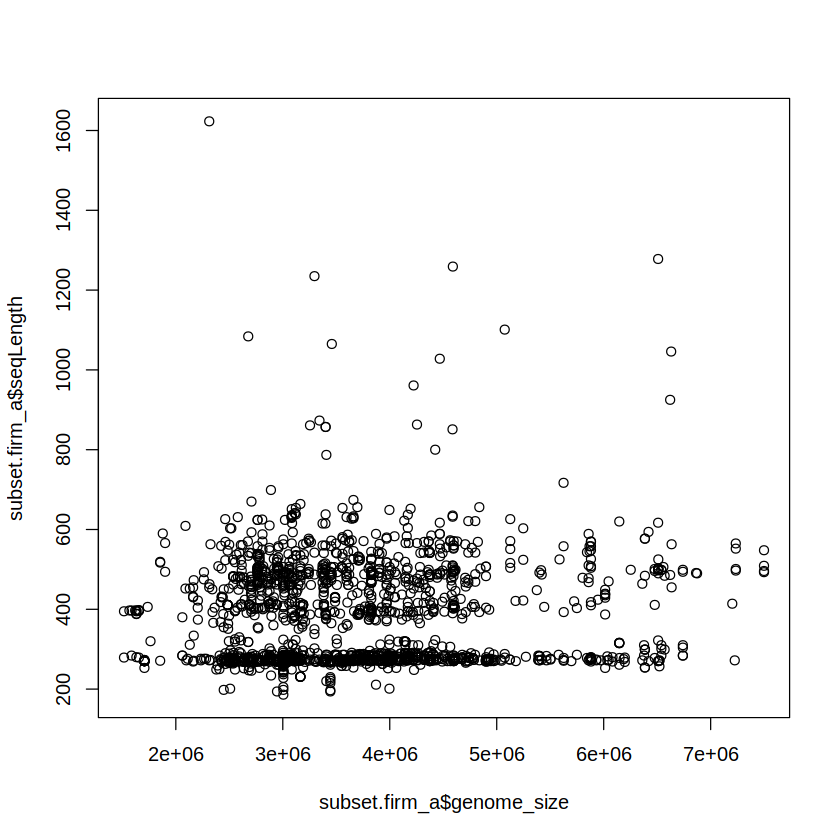

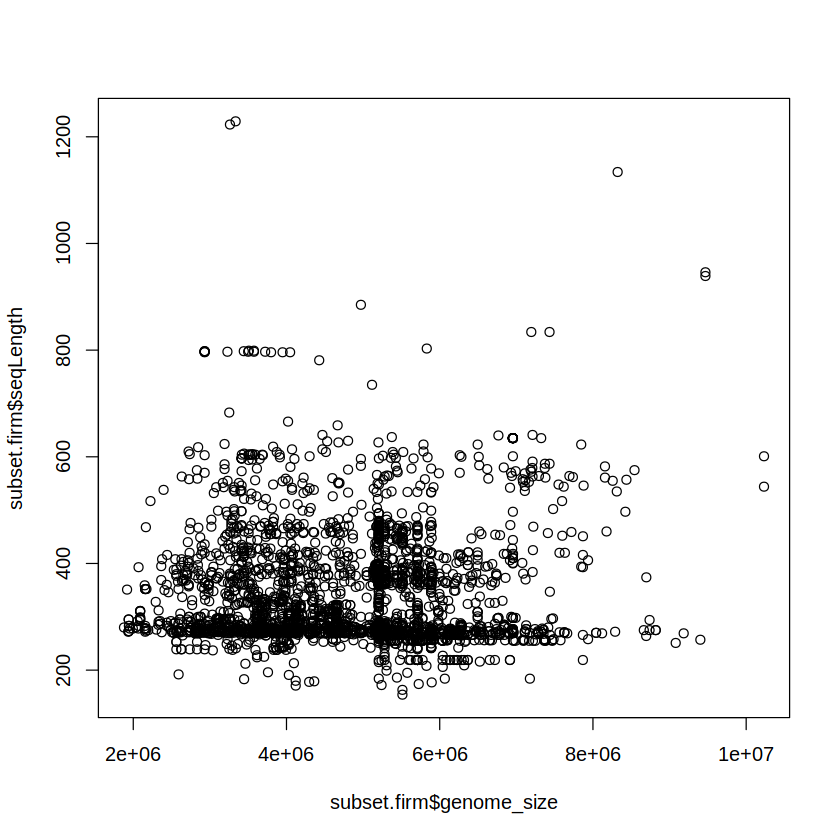

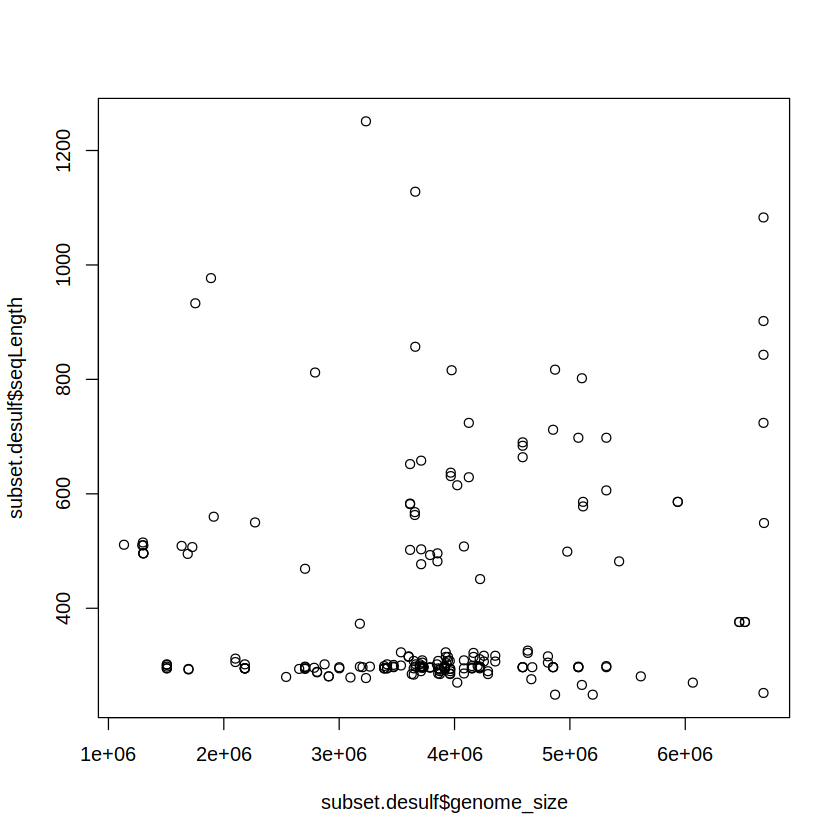

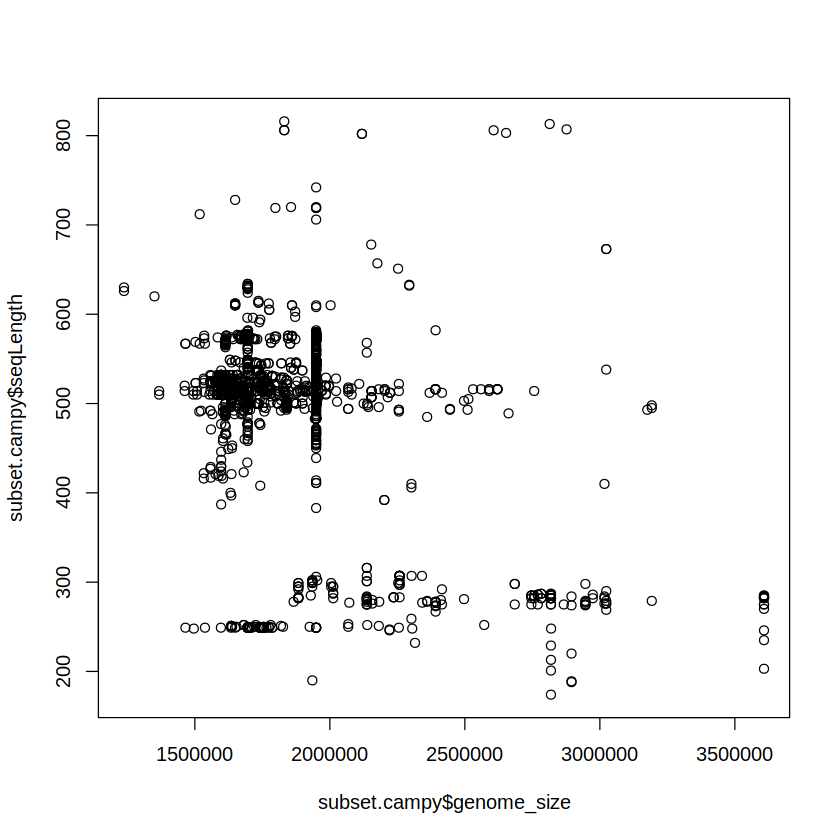

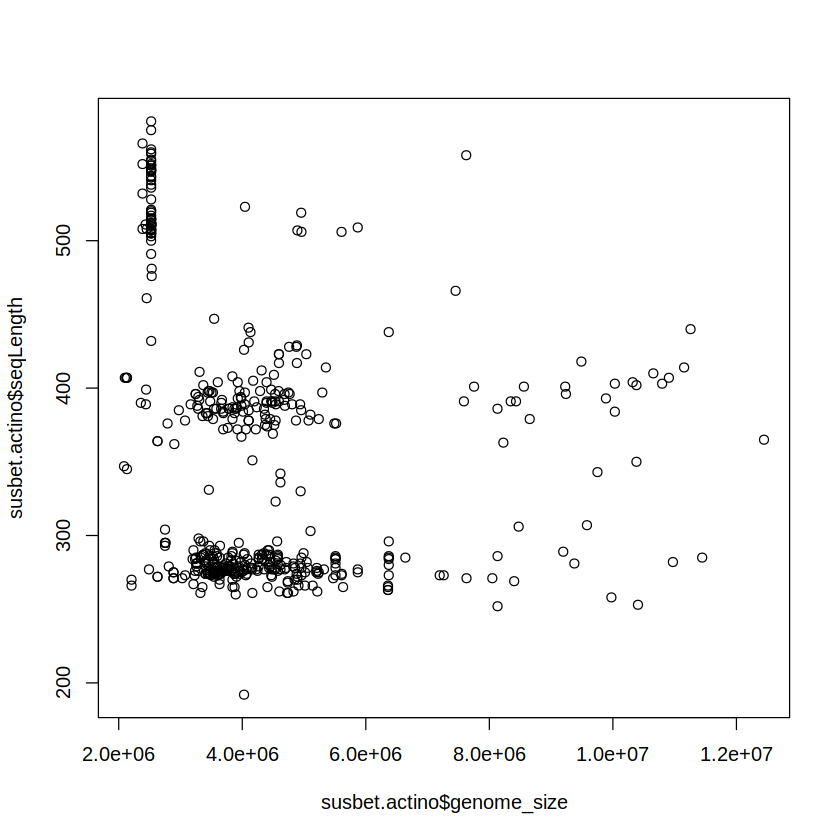

In [141]:
plot(subset.proteo$genome_size,subset.proteo$seqLength)
plot(subset.firm_a$genome_size,subset.firm_a$seqLength)
plot(subset.firm$genome_size,subset.firm$seqLength)
plot(subset.desulf$genome_size,subset.desulf$seqLength)
plot(subset.campy$genome_size,subset.campy$seqLength)
plot(susbet.actino$genome_size,susbet.actino$seqLength)

### Correlation seqLen and genome size + taxonomy

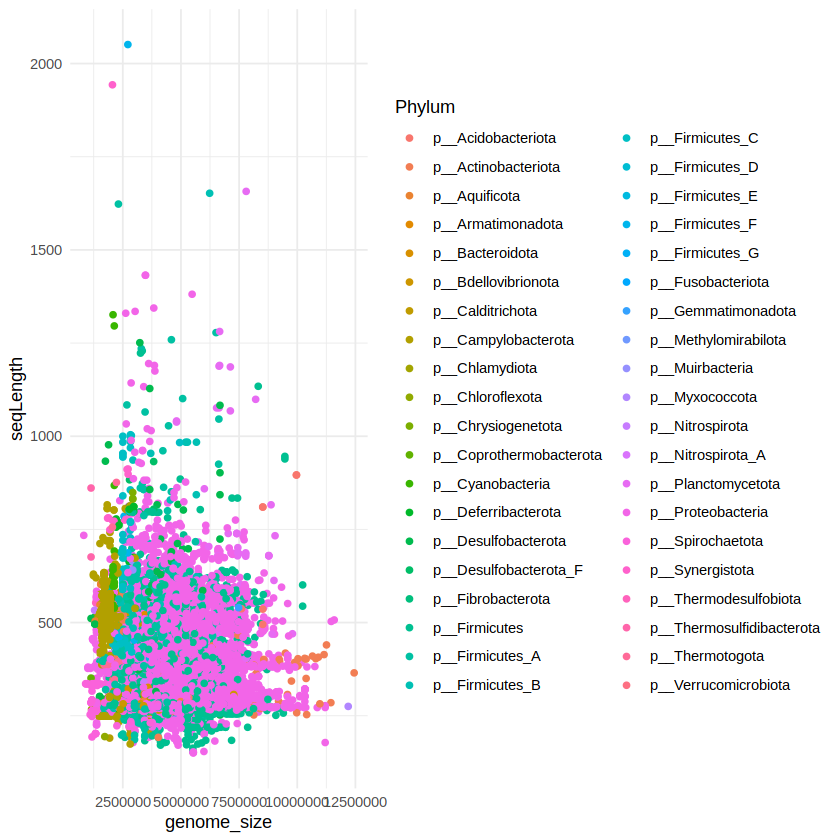

In [154]:
ggplot(data = full.db.taxonomy.length, aes(x = genome_size, y = seqLength, color = Phylum)) +
  geom_point() +
  theme_minimal()


In [161]:
cor(full.db.taxonomy.length$genome_size,full.db.taxonomy.length$seqLength)

[1] -0.1606617

In [165]:
pcor.xy.z = lm(full.db.taxonomy.length$seqLength ~full.db.taxonomy.length$genome_size + full.db.taxonomy.length$Species)

In [166]:
summary(pcor.xy.z)


Call:
lm(formula = full.db.taxonomy.length$seqLength ~ full.db.taxonomy.length$genome_size + 
    full.db.taxonomy.length$Species)

Residuals:
    Min      1Q  Median      3Q     Max 
-626.50  -16.00    0.00   14.42  966.33 

Coefficients:
                                                                                Estimate
(Intercept)                                                                    4.098e+02
full.db.taxonomy.length$genome_size                                            4.534e-06
full.db.taxonomy.length$Speciess__14-2 sp000403845                             4.107e+01
full.db.taxonomy.length$Speciess__14-2 sp001940225                            -4.504e+01
full.db.taxonomy.length$Speciess__21-14-0-10-47-8 sp002773975                 -1.436e+02
full.db.taxonomy.length$Speciess__21-14-all-39-27 sp002786715                 -1.490e+02
full.db.taxonomy.length$Speciess__28-YEA-48 sp900104955                       -1.299e+02
full.db.taxonomy.length$Speciess__34-65-8 sp002

In [167]:
pcor.coefficient = cor(full.db.taxonomy.length$genome_size,resid(pcor.xy.z))
pcor.coefficient

[1] -4.181345e-18

Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$continuous from 'density' to 'densityDiag'”


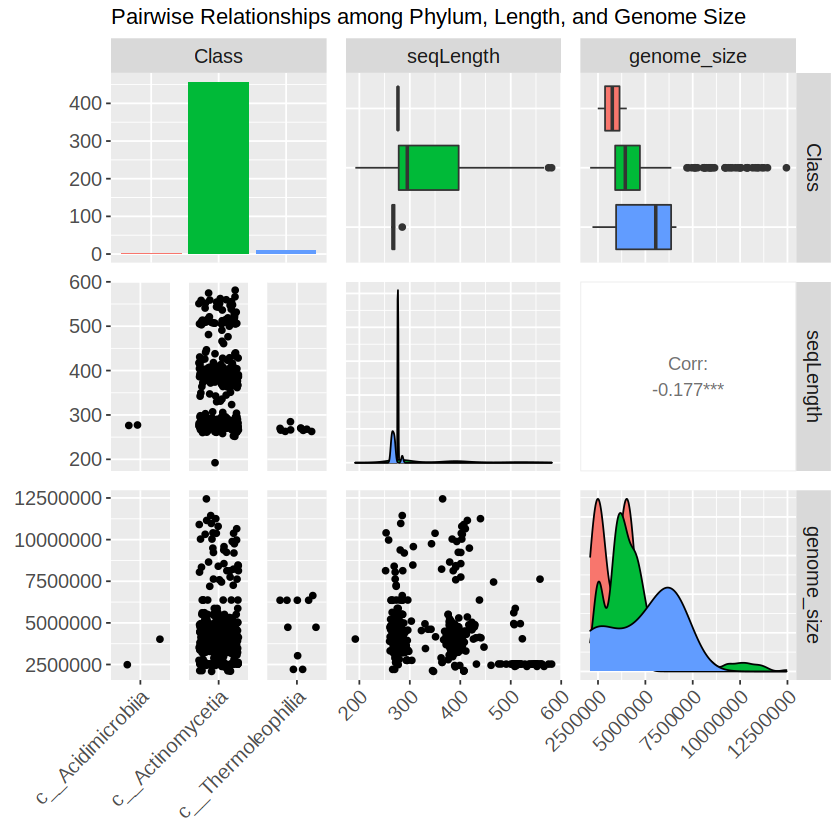

In [153]:
library(GGally)

# Scatterplot matrix
ggpairs(susbet.actino, columns = c("Class", "seqLength", "genome_size"), aes(fill=Class),
        lower = list(continuous = "points", combo = "dot"), 
        diag = list(continuous = "density", combo = "bar",alpha=0.6), 
        title = "Pairwise Relationships among Phylum, Length, and Genome Size") + 
        #scale_fill_manual(values = phylum_colors)+ 
  scale_size_area() +
  theme(axis.text.x = element_text(size = 12,angle=45,hjust=1),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        strip.text = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        panel.spacing = unit(0.4, "cm"))


Selecting by n


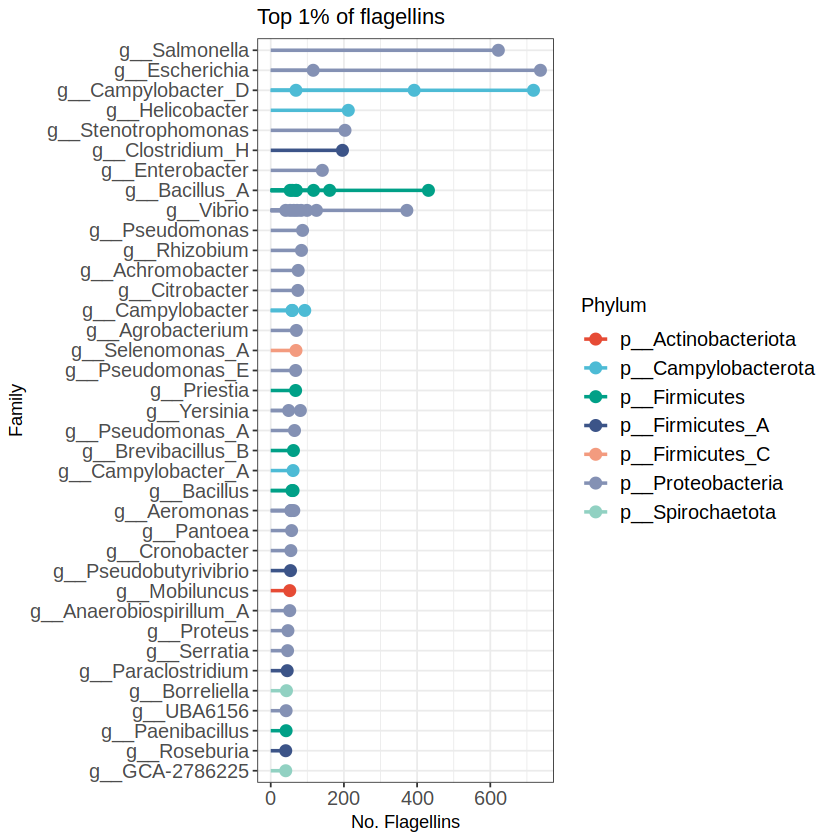

In [171]:
#top.1 = filter(sorted.per.phylum) %>% top_frac(0.01)
ggplot(filter(count.taxonomy.fulldb) %>% top_frac(0.01),aes(y=reorder(Genus,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Genus,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 1% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
                        

Selecting by n


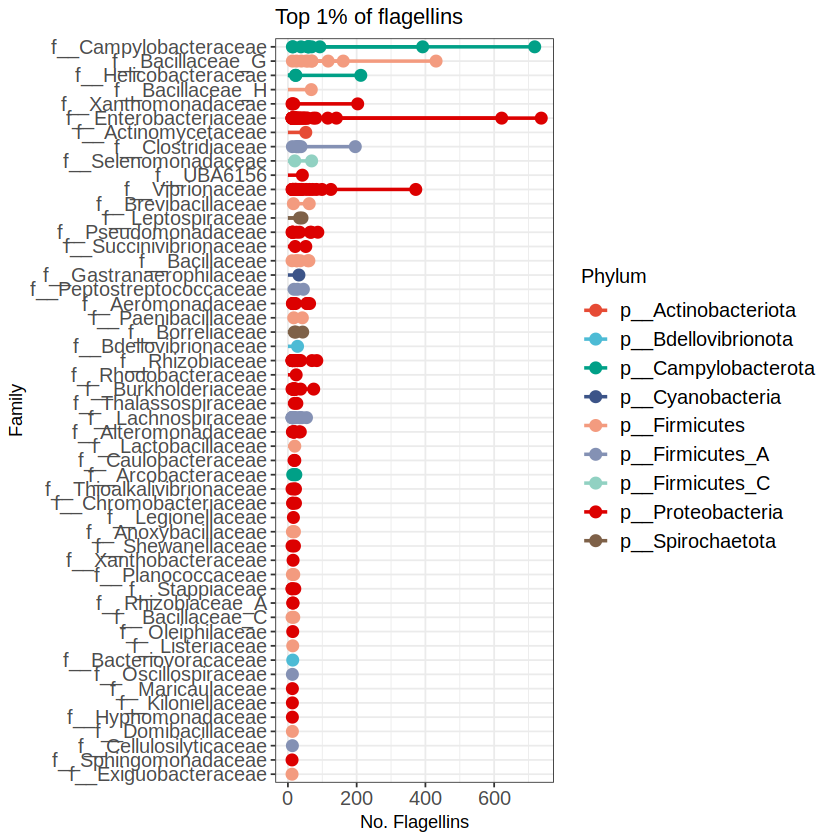

In [116]:
#top.1 = filter(sorted.per.phylum) %>% top_frac(0.01)
#top50 = top_n(count.taxonomy.fulldb$n*0.5)
ggplot(filter(count.taxonomy.fulldb) %>% top_n(sum(count.taxonomy.fulldb$n)*0.01),aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 1% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
                        

### Procrustes analysis between gene tree and taxonomy

In [172]:
fulldb.tre = read_tree("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/flagellin_phylogeny/curatedflab.with.outgroup.tre")

In [175]:
dist_genetic = cophenetic(all.tre)

In [176]:
head(dist_genetic)

SNX72910.1 KNY28622.1 KJR47801.1 WP_092074313.1 WP_052504473.1
SNX72910.1     0.0000000  0.2647219  0.3439534  0.4110724      0.3931563     
KNY28622.1     0.2647219  0.0000000  0.3424740  0.4095931      0.3916769     
KJR47801.1     0.3439534  0.3424740  0.0000000  0.2736836      0.2557675     
WP_092074313.1 0.4110724  0.4095931  0.2736836  0.0000000      0.2766953     
WP_052504473.1 0.3931563  0.3916769  0.2557675  0.2766953      0.0000000     
OME87138.1     0.3839673  0.3824879  0.2465785  0.2675063      0.1911135     
               OME87138.1 WP_076282421.1 OMF13103.1 OMF13104.1 KJS19054.1 ⋯
SNX72910.1     0.3839673  0.39638344     0.5055406  0.3495642  0.3859343  ⋯
KNY28622.1     0.3824879  0.39490407     0.5040612  0.3480848  0.3844550  ⋯
KJR47801.1     0.2465785  0.25899460     0.4853641  0.3293877  0.3783695  ⋯
WP_092074313.1 0.2675063  0.27992240     0.5524832  0.3965068  0.4454885  ⋯
WP_052504473.1 0.1911135  0.20352962     0.5345670  0.3785906  0.4275724  ⋯
OME87138.1     0.0000000  0.09637221     0.5253781  0.3694017  0.4183834  ⋯
               WP_025786014.1 SKA95643.1 RDW21373.1 WP_116555263.1 SFK79577.1
SNX72910.1     0.3987671      0.4229731  0.4692160  0.4213727      0.4078145 
KNY28622.1     0.3972877      0.4214937  0.4677367  0.4198933      0.4063352 
KJR47801.1     0.3912022      0.4154082  0.4616512  0.4138078      0.4002497 
WP_092074313.1 0.4583212      0.4825273  0.5287702  0.4809269      0.4673687 
WP_052504473.1 0.4404051      0.4646111  0.5108541  0.4630108      0.4494526 
OME87138.1     0.4312161      0.4554221  0.5016651  0.4538218      0.4402636 
               EST55409.1 SDJ12662.1 WP_085522068.1 RAV03104.1 EXX90919.1
SNX72910.1     0.4004910  0.3917815  0.5366543      0.3937785  0.4257313 
KNY28622.1     0.3990117  0.3903021  0.5351749      0.3922991  0.4242520 
KJR47801.1     0.3929262  0.3842166  0.5290894      0.3862136  0.4181665 
WP_092074313.1 0.4600452  0.4513357  0.5962084      0.4533327  0.4852855 
WP_052504473.1 0.4421291  0.4334196  0.5782923      0.4354165  0.4673694 
OME87138.1     0.4329401  0.4242306  0.5691033      0.4262275  0.4581804

In [182]:
taxa_numeric = select(fla.taxonomy.length,c(Accession,Phylum,Class,Order,Family,Genus,Species)


ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: taxa_numeric = select(fla.taxonomy.length,c(Accession,Phylum,Class,Order,Family,Genus,Species)
2: 
  ^


In [181]:
head(taxa_numeric)

taxon          phylum class order family genus species
1 WP_088222031.1 NA     NA    NA    NA     NA    NA     
2 PEB57461.1     NA     NA    NA    NA     NA    NA     
3 OQU41310.1     NA     NA    NA    NA     NA    NA     
4 WP_108001953.1 NA     NA    NA    NA     NA    NA     
5 WP_075123400.1 NA     NA    NA    NA     NA    NA     
6 CUH95360.1     NA     NA    NA    NA     NA    NA

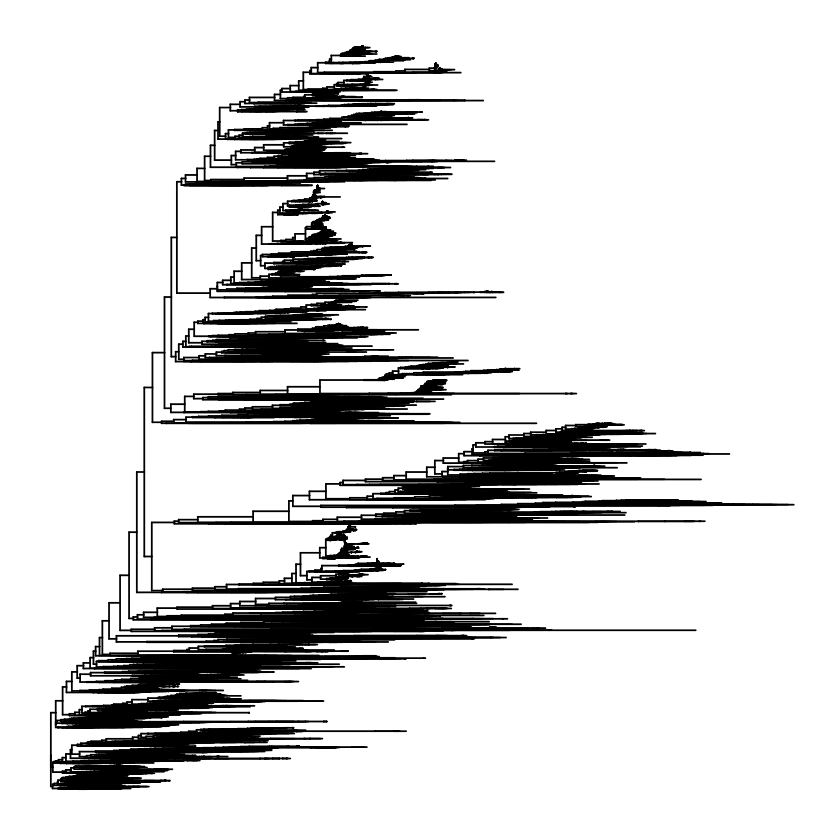

In [173]:
ggplot(fulldb.tre) + geom_tree() + theme_tree()

## Shortbred flagellins

In [23]:
fla.taxonomy.length=inner_join(length.seqs,taxonomy.full.db,by="Accession")%>%
select(c(contains(c("genome","assembly")),"Accession","length","HVR_length","ncbi_taxid","ncbi_phylum","gtdb_taxonomy","genome_size"))%>%
separate(gtdb_taxonomy,into=c("Domain","Phylum","Class","Order","Family","Genus","Species"),sep=";")

In [177]:
names(fla.taxonomy.length)

[1] "genome_size"                     "gtdb_genome_representative"     
 [3] "ncbi_genome_category"            "ncbi_genome_representation"     
 [5] "ncbi_assembly_level"             "ncbi_assembly_name"             
 [7] "ncbi_assembly_type"              "ncbi_genbank_assembly_accession"
 [9] "Accession"                       "length"                         
[11] "HVR_length"                      "ncbi_taxid"                     
[13] "ncbi_phylum"                     "Domain"                         
[15] "Phylum"                          "Class"                          
[17] "Order"                           "Family"                         
[19] "Genus"                           "Species"

Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 40.”
Warning message:
“This manual palette can handle a maximum of 9 values. You have supplied 40.”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


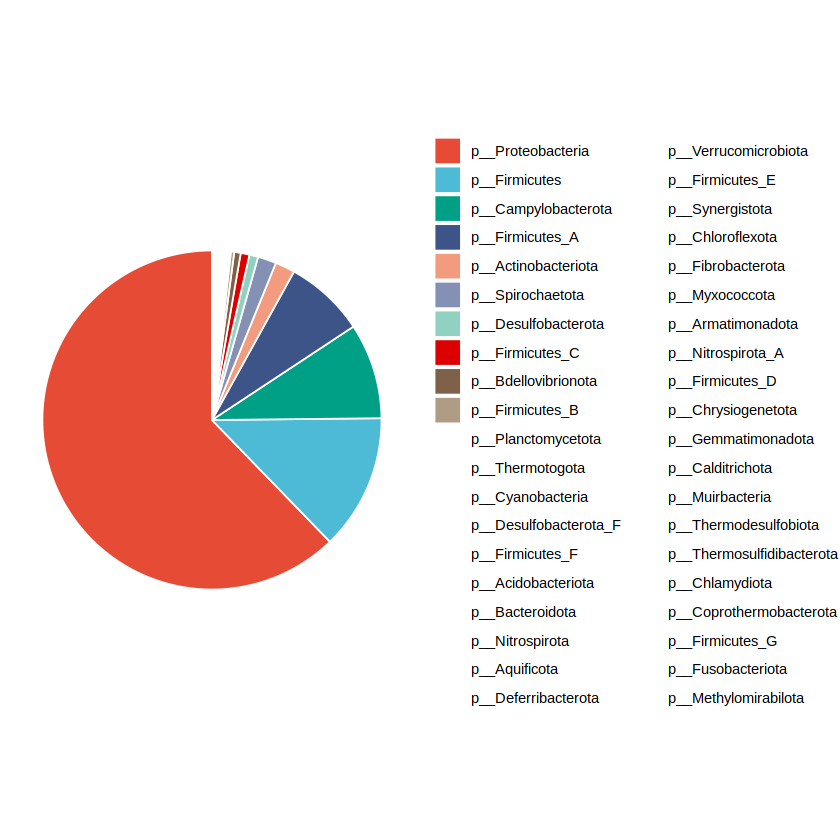

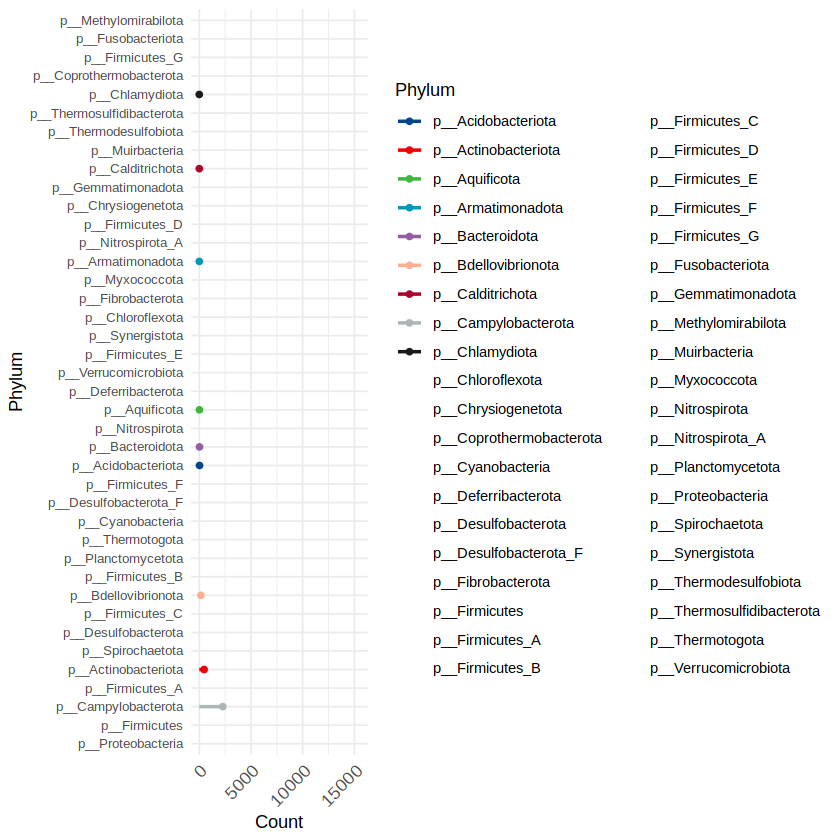

In [25]:
#Plot taxonomy by phylum

ggplot(data=count_phylum.full.db,aes(x="",y=n,fill=reorder(Phylum,-n))) +
  geom_bar(stat="identity",width=1,color="white")+
  coord_polar("y",start = 0)+
  scale_fill_npg(name="Phylum")+
  theme_void()+
  labs(fill="Source")+
  theme(legend.title = element_blank())

### Plot genome size, sequence length 

In [26]:
genome_gene_sizes = count(fla.taxonomy.length,gtdb_genome_representative,genome_size)

`geom_smooth()` using formula 'y ~ x'



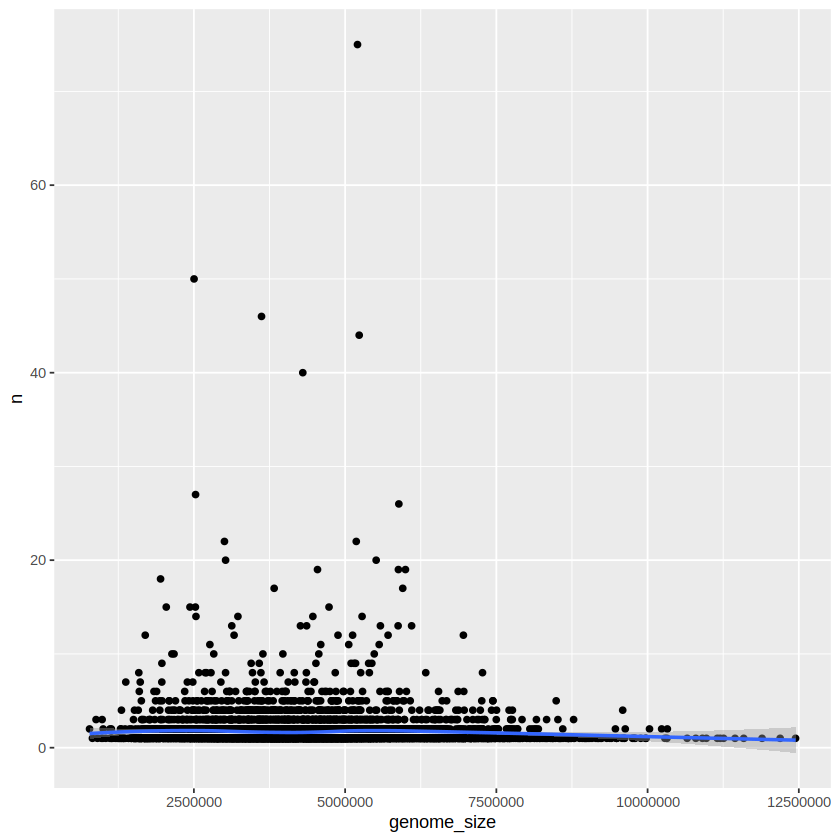

In [27]:
ggplot(genome_gene_sizes,aes(x=genome_size,y=n))+geom_point()+geom_smooth(method="loess")

`geom_smooth()` using formula 'y ~ x'



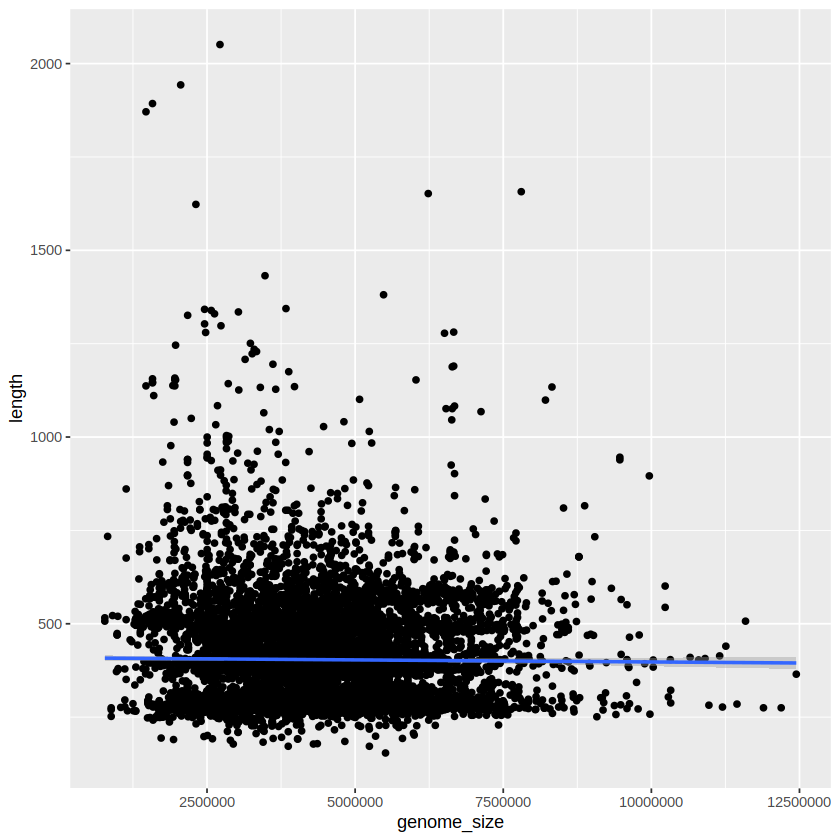

In [28]:
ggplot(data=fla.taxonomy.length,aes(x=genome_size,y=length))+geom_point()+geom_smooth(method="lm")


In [29]:
filter(fla.taxonomy.length,length<180)

genome_size gtdb_genome_representative ncbi_genome_category
1 4362047     RS_GCF_002287375.1         none                
2 5513190     RS_GCF_001583695.1         none                
3 4295882     RS_GCF_002157855.1         none                
4 5240711     RS_GCF_000971965.1         none                
5 2943210     RS_GCF_000225005.1         none                
6 3871245     RS_GCF_900114405.1         none                
  ncbi_genome_representation ncbi_assembly_level
1 full                       Contig             
2 full                       Scaffold           
3 full                       Complete Genome    
4 full                       Scaffold           
5 full                       Contig             
6 full                       Scaffold           
  ncbi_assembly_name                      ncbi_assembly_type
1 ASM228737v1                             na                
2 ASM220021v1                             na                
3 ASM215785v1                             na                
4 ASM97196v1                              na                
5 PHS-1-454                               na                
6 IMG-taxon 2654588176 annotated assembly na                
  ncbi_genbank_assembly_accession Accession      length HVR_length ncbi_taxid
1 GCA_002287375.1                 WP_095654077.1 179    -61        2024555   
2 GCA_002200215.1                 PEM23444.1     154    -86        1890302   
3 GCA_002157855.1                 WP_064097877.1 178    -62          79883   
4 GCA_000971965.1                 WP_046212871.1 172    -68        1567107   
5 GCA_000225005.2                 EHQ51648.1     178    -62         519989   
6 GCA_900114405.1                 SFL40111.1     172    -68        1855374   
  ncbi_phylum    Domain      Phylum            Class                 
1 Firmicutes     d__Bacteria p__Firmicutes     c__Bacilli            
2 Firmicutes     d__Bacteria p__Firmicutes     c__Bacilli            
3 Firmicutes     d__Bacteria p__Firmicutes     c__Bacilli            
4 Firmicutes     d__Bacteria p__Firmicutes     c__Bacilli            
5 Proteobacteria d__Bacteria p__Proteobacteria c__Gammaproteobacteria
6 Firmicutes     d__Bacteria p__Firmicutes_A   c__Clostridia         
  Order                    Family                    Genus                
1 o__Bacillales_D          f__Amphibacillaceae       g__Virgibacillus_G   
2 o__Bacillales            f__Bacillaceae_G          g__Bacillus_A        
3 o__Bacillales            f__Bacillaceae_I          g__Sutcliffiella     
4 o__Paenibacillales       f__Paenibacillaceae       g__Paenibacillus_J   
5 o__Ectothiorhodospirales f__Ectothiorhodospiraceae g__Ectothiorhodospira
6 o__Lachnospirales        f__Lachnospiraceae        g__NK4A144           
  Species                          
1 s__Virgibacillus_G profundi      
2 s__Bacillus_A wiedmannii         
3 s__Sutcliffiella horikoshii_C    
4 s__Paenibacillus_J wulumuqiensis 
5 s__Ectothiorhodospira sp000225005
6 s__NK4A144 sp900114405

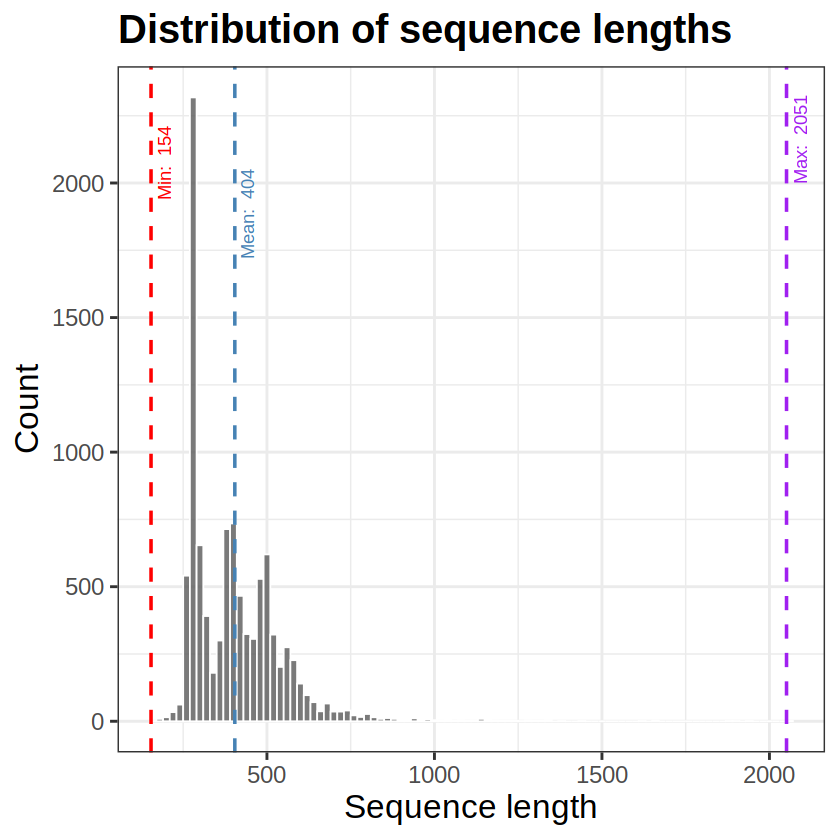

In [30]:
ggplot(data=fla.taxonomy.length, aes(x=length)) +
  geom_histogram(binwidth=20, alpha=0.8, color="white") +
  theme_bw(base_size=18) +
  labs(x="Sequence length", y="Count", title="Distribution of sequence lengths") +
  theme(axis.title=element_text(size=20), plot.title=element_text(size=24, face="bold")) +
#geom_vline(xintercept=median(fla.taxonomy.length$length), color="orange", size=1, linetype="dashed") +

geom_vline(xintercept=mean(fla.taxonomy.length$length), color="steelblue", size=1, linetype="dashed") +
annotate("text", x=mean(fla.taxonomy.length$length), y=12, label=paste("Mean: ", round(mean(fla.taxonomy.length$length), 0)), hjust=-5.1,vjust=1.5,angle=90, color="steelblue") +
  
 
geom_vline(xintercept=min(fla.taxonomy.length$length), color="red", size=1, linetype="dashed") +
annotate("text", x=min(fla.taxonomy.length$length), y=12, label=paste("Min: ", round(min(fla.taxonomy.length$length), 0)), hjust=-7,vjust=1.5,angle=90, color="red") +

geom_vline(xintercept=max(fla.taxonomy.length$length), color="purple", size=1, linetype="dashed")+
annotate("text", x=mean(fla.taxonomy.length$length), y=12, label=paste("Max: ", round(max(fla.taxonomy.length$length), 0)), hjust=-6,vjust=44,angle=90, color="purple")

### Per phylum counts

In [31]:
count.per.phylum=count(fla.taxonomy.length,Phylum,sort=TRUE,.drop=FALSE)%>%
                    mutate(Phylum=str_remove_all(Phylum,"p__"))

In [32]:
head(count.per.phylum)

Phylum           n   
1 Proteobacteria   5637
2 Firmicutes       1361
3 Firmicutes_A     1167
4 Actinobacteriota  304
5 Campylobacterota  280
6 Desulfobacterota  142

In [33]:
sorted.per.phylum = count(fla.taxonomy.length,Phylum,Family,sort=TRUE,.drop=FALSE)%>%
                    mutate(Phylum=str_remove_all(Phylum,"p__"))%>%
                    mutate(Family=str_remove_all(Family,"f__"))

In [34]:
head(sorted.per.phylum)

Phylum         Family             n  
1 Proteobacteria Burkholderiaceae   752
2 Proteobacteria Enterobacteriaceae 653
3 Firmicutes_A   Lachnospiraceae    549
4 Proteobacteria Rhizobiaceae       445
5 Proteobacteria Rhodobacteraceae   430
6 Proteobacteria Pseudomonadaceae   343

#### Top 10% of phyla

Selecting by n


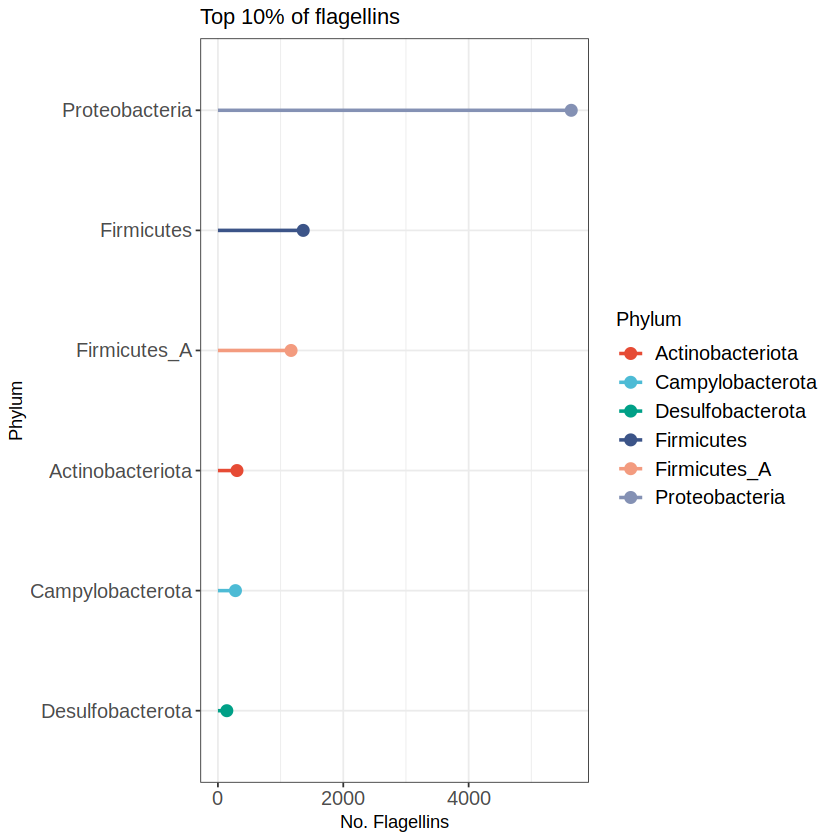

In [35]:
top.10.phylum = filter(count.per.phylum) %>% top_frac(0.1)
ggplot(top.10.phylum,aes(y=reorder(Phylum,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Phylum,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Phylum")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 10% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        

#### Top 1% of Family

Selecting by n


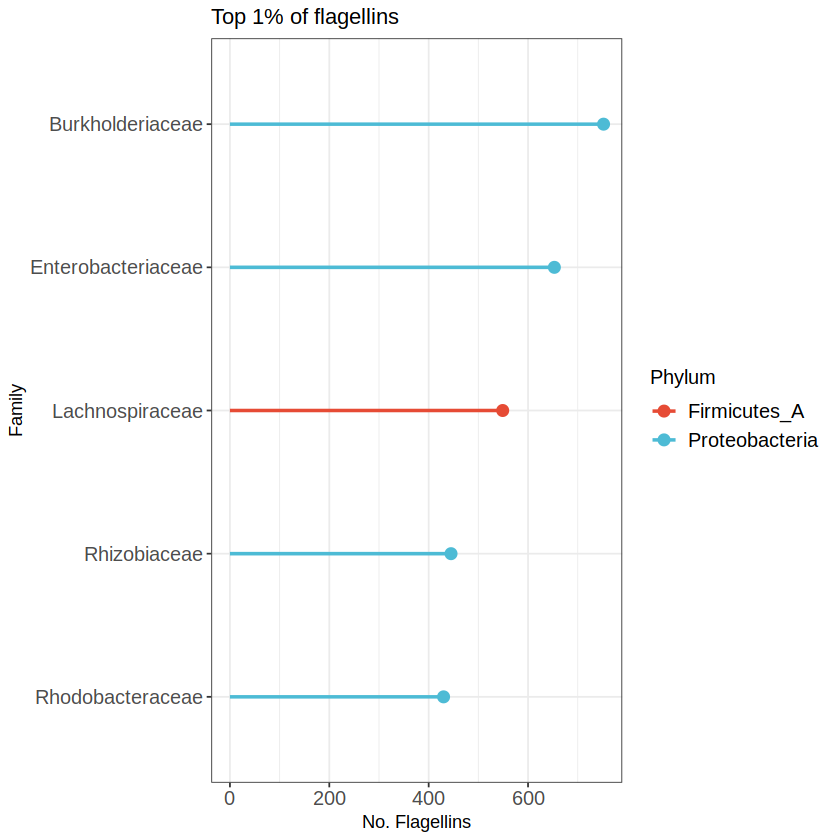

In [36]:
top.1 = filter(sorted.per.phylum) %>% top_frac(0.01)
ranked.fla.top.1 = ggplot(top.1,aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 1% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
                        
ranked.fla.top.1

#### Top 3% of Family

Selecting by n


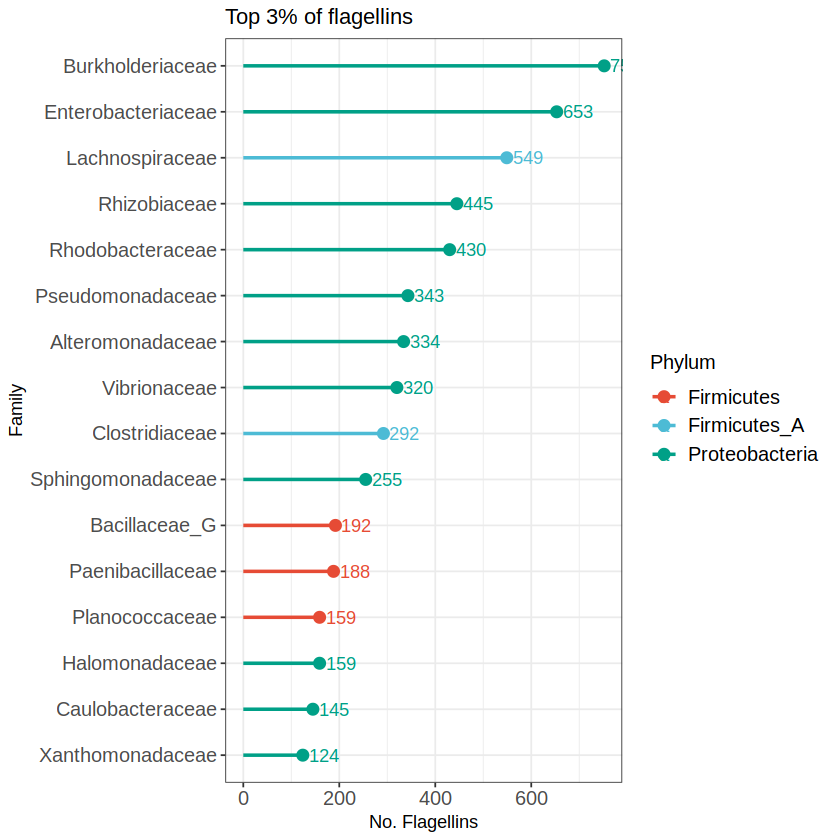

In [37]:
top.3 = filter(sorted.per.phylum) %>% top_frac(0.03)
ranked.fla.top.3 = ggplot(top.3,aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        geom_text(aes(label = n), hjust = -0.2) +
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 3% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
                        
ranked.fla.top.3

#### Top 5% of Family

Selecting by n


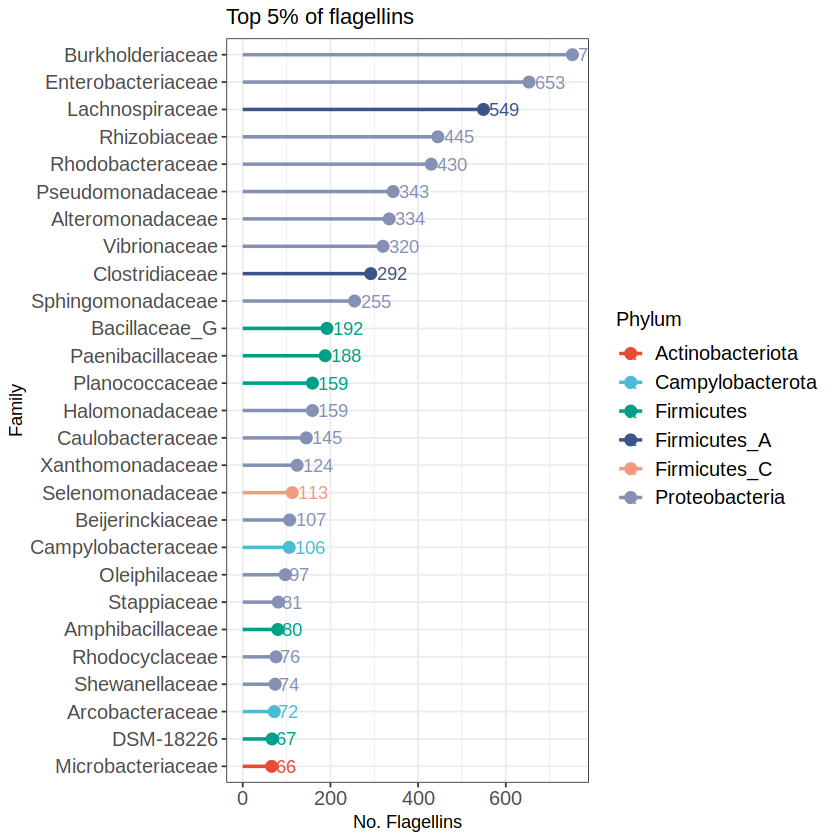

In [207]:
top.5 = filter(sorted.per.phylum) %>% top_frac(0.05)
ranked.fla.top.5 = ggplot(top.5,aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        geom_text(aes(label = n), hjust = -0.2)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 5% of flagellins")+
                        theme(axis.text.x= element_text(size=12),
                             axis.text.y=element_text(size=12),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
                        
ranked.fla.top.5

#### Top 10% of Family

Selecting by n


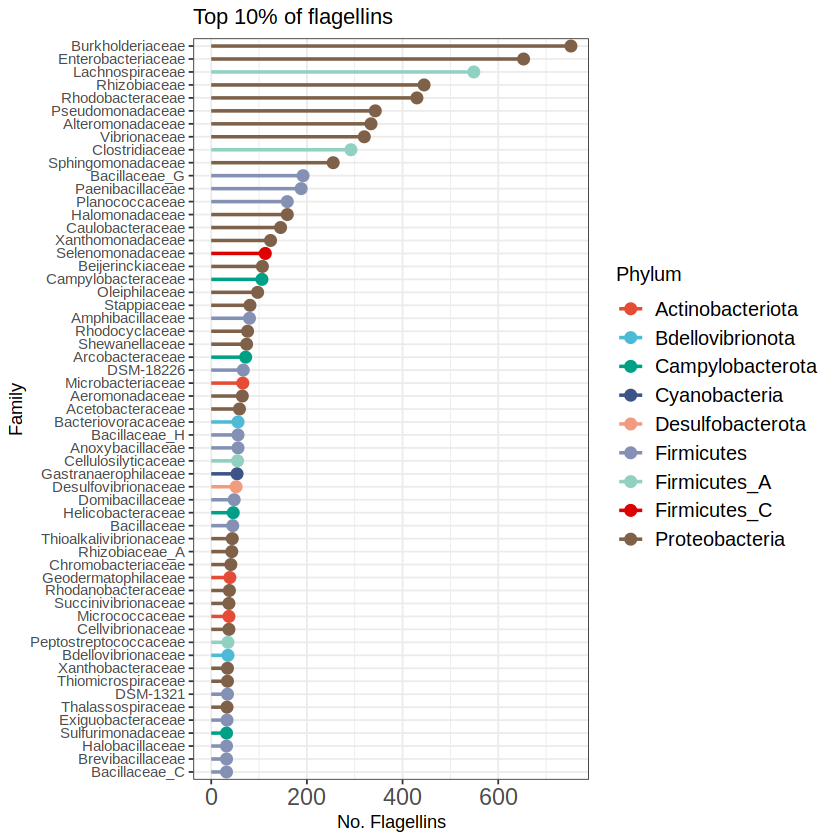

In [39]:
top.10 = filter(sorted.per.phylum) %>% top_frac(0.1)
ranked.fla.top.10 = ggplot(top.10,aes(y=reorder(Family,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Family,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 10% of flagellins")+
                        theme(axis.text.x= element_text(size=14),
                             axis.text.y=element_text(size=9),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )
                        
ranked.fla.top.10

#### Flagellin counts per Genus

In [40]:
count.per.genus = count(fla.taxonomy.length,Genus,Phylum,sort=TRUE)

In [41]:
head(count.per.genus)

Genus                Phylum            n  
1 g__Pseudomonas_E     p__Proteobacteria 193
2 g__Vibrio            p__Proteobacteria 190
3 g__Bacillus_A        p__Firmicutes     187
4 g__Pseudoalteromonas p__Proteobacteria 112
5 g__Clostridium       p__Firmicutes_A   105
6 g__Sphingomonas      p__Proteobacteria 102

Selecting by n
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


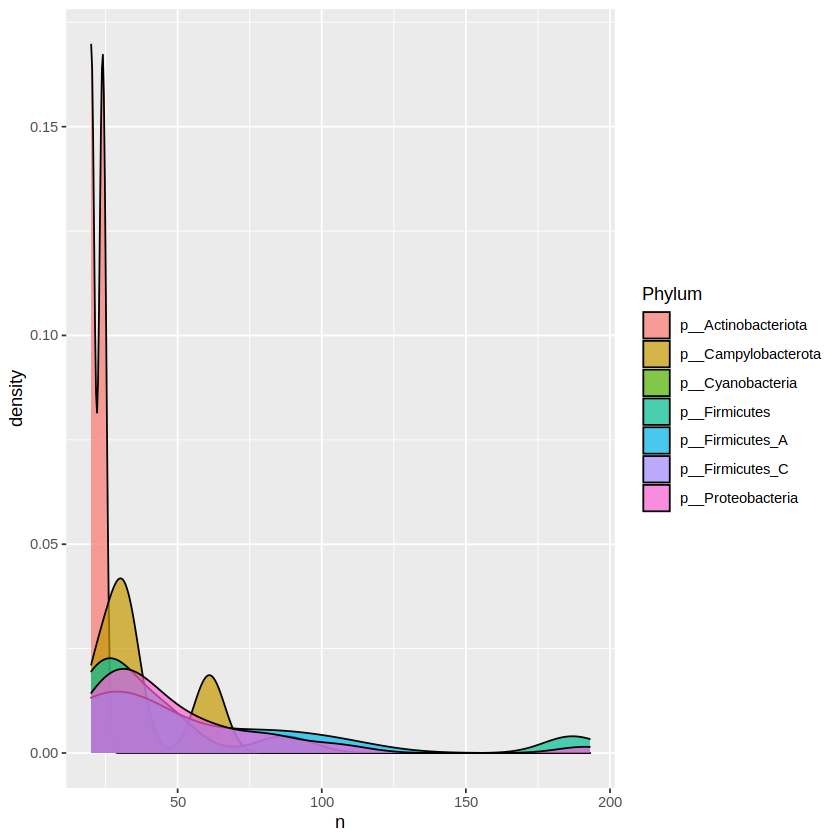

In [62]:
#top_n(count.per.genus,n=100)
ggplot(data=top_n(count.per.genus,n=80),aes(x=n,fill=Phylum))+
     geom_density(alpha=0.7)

In [ ]:
top.10.genus = filter(count.per.genus) %>% top_frac(0.03)
ggplot(top.10.genus,aes(y=reorder(Genus,n,descending=TRUE),x=n,color=Phylum))+
                        geom_segment(aes(yend=Genus,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Genus")+
                        scale_color_npg()+
                        theme_bw()+
                        ggtitle("Top 3% of Genera")+
                        theme(axis.text.x= element_text(size=14),
                             axis.text.y=element_text(size=9),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

#### Flagellin counts in Lachnospiraceae

In [ ]:
count.lachno = count(fla.taxonomy.length,Family,Genus,sort = TRUE)%>%
filter(Family == "f__Lachnospiraceae")

In [ ]:
top.lachno = top_frac(count.lachno,0.5)
ggplot(top.lachno,aes(y=reorder(Genus,n,descending=TRUE),x=n),color=Family)+
                        geom_segment(aes(yend=Genus,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        guides(scale="none")+
                        theme_bw()+
                        ggtitle("Top 50% of flagellins")+
                        theme(axis.text.x= element_text(size=14),
                             axis.text.y=element_text(size=9),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

In [ ]:
top.10.phylum

#### Scatterplot matrix for phylum, seqLength and genomeSize

In [310]:
top.10.phylum = filter(count.per.phylum) %>% top_frac(0.1)
#top.10.phylum = filter(count.per.phylum) %>% top_n(10)

Selecting by n


In [312]:
fla.taxonomy.length.top10 = fla.taxonomy.length %>%
    mutate(Phylum=str_remove_all(Phylum,"p__"))%>%
    filter(Phylum %in% top.10.phylum$Phylum)

In [ ]:
count.top.phylum = count(fla.taxonomy.length.top10,Phylum,sort=TRUE)
count.top.phylum

In [ ]:
library(randomcoloR)

In [ ]:
distinctColorPalette(k = 10, altCol = FALSE, runTsne = FALSE)

In [317]:
phylum_colors = c("Actinobacteriota"='#86E09D',
                 "Campylobacterota"='#D3D4C2',
                 "Desulfobacterota"='#DC4EC8',
                 "Firmicutes"='#95E64F',
                 "Firmicutes_A"='#C18AD4',
                 "Proteobacteria"='#7AD7DA')

In [315]:
phylum_colors = c("Actinobacteriota"='#9690DA',
                 "Campylobacterota"='#D7AFCB',
                 "Desulfobacterota"='#96E650',
                 "Firmicutes"='#804CE1',
                 "Firmicutes_A"='#DDCF6C',
                 "Proteobacteria"='#7FDFA0',
                 "Bdellovibrionota" ='#D0D9C0',
                 "Firmicutes_C"='#DA5AC9')

Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$continuous from 'density' to 'densityDiag'”


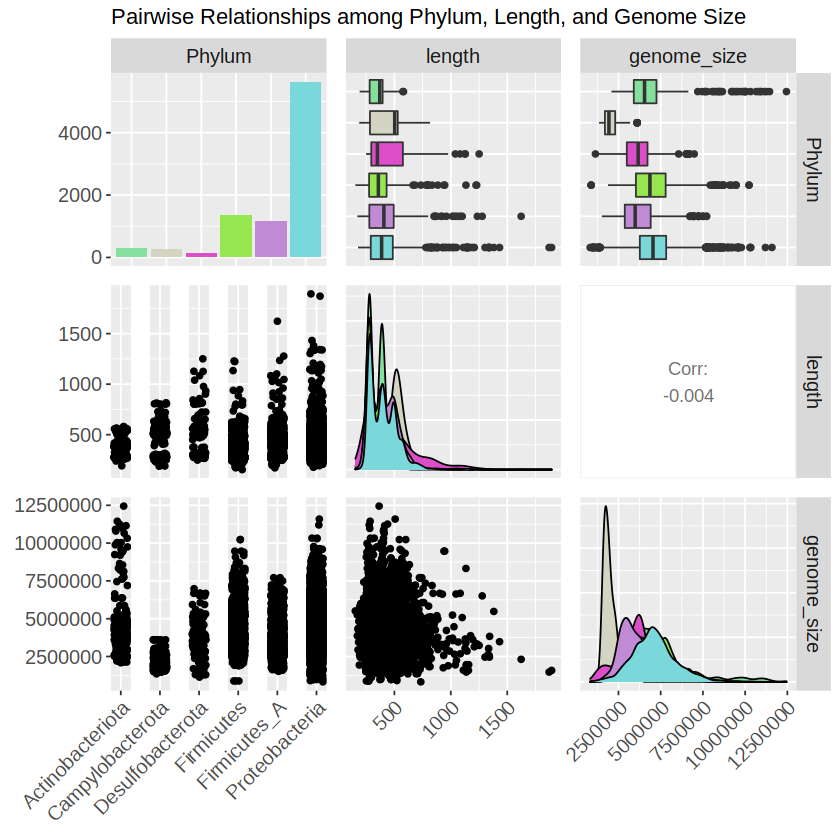

In [318]:
library(GGally)

# Scatterplot matrix
ggpairs(fla.taxonomy.length.top10, columns = c("Phylum", "length", "genome_size"), aes(fill=Phylum),
        lower = list(continuous = "points", combo = "dot"), 
        diag = list(continuous = "density", combo = "bar",alpha=0.6), 
        title = "Pairwise Relationships among Phylum, Length, and Genome Size") + 
        scale_fill_manual(values = phylum_colors)+ 
  scale_size_area() +
  theme(axis.text.x = element_text(size = 12,angle=45,hjust=1),
        axis.text.y = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        strip.text = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        panel.spacing = unit(0.4, "cm"))


In [ ]:
length.per.phylum = count(fla.taxonomy.length,Phylum,length,sort=TRUE)

In [ ]:
head(length.per.phylum)

In [ ]:
count(fla.taxonomy.length,gtdb_genome_representative)

In [ ]:
ggplot(length.per.phylum,aes(y=reorder(Phylum,n,descending=TRUE),x=n))+
                        geom_segment(aes(yend=Genus,xend=0),size=1)+
                        geom_point(size=3)+
                        labs(x="No. Flagellins",y="Family")+
                        scale_color_npg()+
                        guides(scale="none")+
                        theme_bw()+
                        ggtitle("Top 50% of flagellins")+
                        theme(axis.text.x= element_text(size=14),
                             axis.text.y=element_text(size=9),
                             legend.text = element_text(size=12),
                             legend.title = element_text(size=12)
                             )

In [ ]:
ggplot(data=fla.taxonomy.length,aes(x=Phylum,y=length,color=Phylum))+
            geom_boxplot()+
            guides(color=FALSE)

### Import tree

In [63]:
all.tre = read_tree("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/fasttree_trimal_mafft_alignment_fla_sb.tre")

In [64]:
#Assign new tip labels - Accession names have conflicts with iTOL
tips <- all.tre$tip.label
flaID <- paste("fla",1:length(tips), sep = "")
dat <- data.frame(tips, flaID)

In [65]:
#Rename tip labels 
ntree <- sub.taxa.label(all.tre, dat)

In [66]:
dat.tre <- rename(dat,Accession="tips") %>% inner_join(fla.taxonomy.length)

Joining, by = "Accession"


In [ ]:
#write_tsv(dat.tre,"../flagellin_phylogeny/fla.sb.taxonomy.length.tsv")

In [67]:
head(dat.tre)

Accession      flaID genome_size gtdb_genome_representative
1 SNX72910.1     fla1  4511824     RS_GCF_900207585.1        
2 KNY28622.1     fla2  6630821     RS_GCF_001262605.1        
3 KJR47801.1     fla3  5311733     RS_GCF_000960765.1        
4 WP_092074313.1 fla4  4130502     RS_GCF_900104455.1        
5 WP_052504473.1 fla5  4753727     RS_GCF_008180865.1        
6 OME87138.1     fla6  7846829     RS_GCF_001956295.1        
  ncbi_genome_category ncbi_genome_representation ncbi_assembly_level
1 none                 full                       Scaffold           
2 none                 full                       Scaffold           
3 none                 full                       Contig             
4 none                 full                       Scaffold           
5 none                 full                       Contig             
6 none                 full                       Contig             
  ncbi_assembly_name                      ncbi_assembly_type
1 IMG-taxon 2740891863 annotated assembly na                
2 ASM74584v1                              na                
3 ASM96076v1                              na                
4 IMG-taxon 2622736508 annotated assembly na                
5 ASM818081v1                             na                
6 ASM195629v1                             na                
  ncbi_genbank_assembly_accession ⋯ HVR_length ncbi_taxid ncbi_phylum
1 GCA_900207585.1                 ⋯  30        1448271    Firmicutes 
2 GCA_000745845.1                 ⋯ 806         398512    Firmicutes 
3 GCA_000960765.1                 ⋯ 154        1617025    Firmicutes 
4 GCA_900104455.1                 ⋯ 171         146817    Firmicutes 
5 GCA_008180815.1                 ⋯ 126         189382    Firmicutes 
6 GCA_001956295.1                 ⋯ 154        1920420    Firmicutes 
  Domain      Phylum          Class                 Order                  
1 d__Bacteria p__Firmicutes   c__Bacilli            o__Bacillales_B        
2 d__Bacteria p__Firmicutes_A c__Clostridia         o__Acetivibrionales    
3 d__Bacteria p__Firmicutes_B c__Desulfitobacteriia o__Desulfitobacteriales
4 d__Bacteria p__Firmicutes_C c__Negativicutes      o__Selenomonadales_A   
5 d__Bacteria p__Firmicutes   c__Bacilli            o__Bacillales_B        
6 d__Bacteria p__Firmicutes   c__Bacilli            o__Paenibacillales     
  Family                    Genus               
1 f__Caldibacillaceae_A     g__Bacillus_BF      
2 f__Acetivibrionaceae      g__Pseudobacteroides
3 f__Desulfitobacteriaceae  g__Desulfosporosinus
4 f__Dendrosporobacteraceae g__Dendrosporobacter
5 f__Bacillaceae_B          g__Rossellomorea    
6 f__Paenibacillaceae       g__Paenibacillus_C  
  Species                            
1 s__Bacillus_BF oleivorans          
2 s__Pseudobacteroides cellulosolvens
3 s__Desulfosporosinus sp000960765   
4 s__Dendrosporobacter quercicolus   
5 s__Rossellomorea aquimaris_D       
6 s__Paenibacillus_C sp001956295

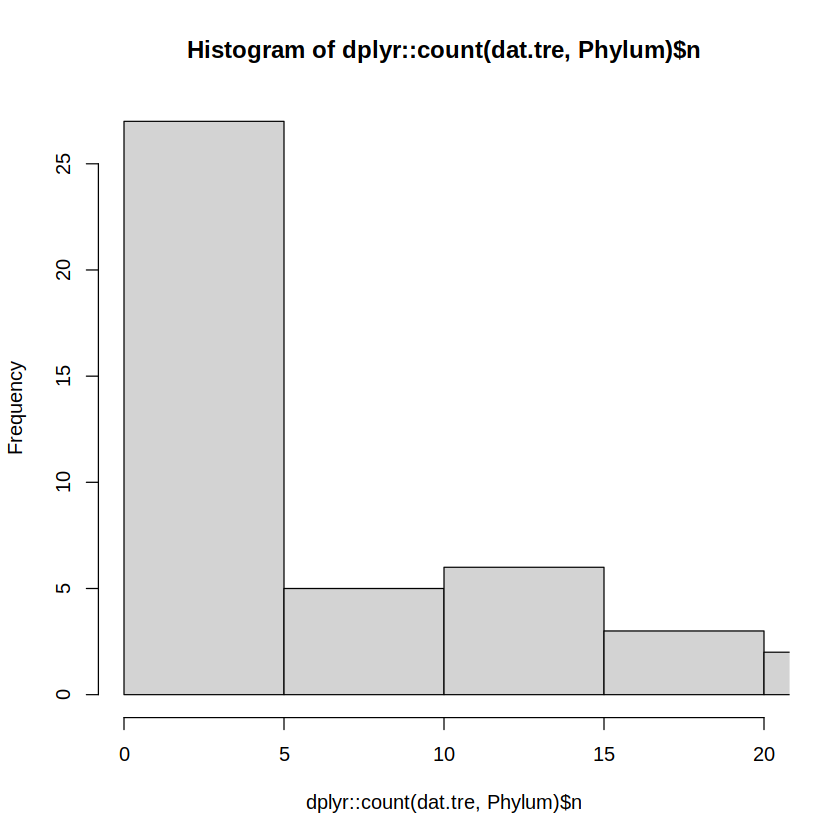

In [68]:
hist(dplyr::count(dat.tre,Phylum)$n,breaks=1000,xlim=c(0,20))

In [69]:
phyla.counts=dplyr::count(dat.tre,Phylum)

In [70]:
order.phyla=arrange(phyla.counts,desc(n))

In [71]:
nrow(order.phyla)

[1] 61

In [72]:
library(RColorBrewer)

In [73]:
cols = colorRampPalette(c("red","green"))(20)

In [74]:
cols =c(brewer.pal(12,"Paired"),rep("#3A3B3C",49))

In [75]:
length(cols)

[1] 61

In [76]:
colors.phyla = data.frame(order.phyla,cols)

In [77]:
head(colors.phyla)

Phylum              n    cols   
1 p__Proteobacteria   5637 #A6CEE3
2 p__Firmicutes       1361 #1F78B4
3 p__Firmicutes_A     1167 #B2DF8A
4 p__Actinobacteriota  304 #33A02C
5 p__Campylobacterota  280 #FB9A99
6 p__Desulfobacterota  142 #E31A1C

In [78]:
flagellins.with.colors = left_join(dat.tre,colors.phyla,by="Phylum")

In [79]:
phylum.cols.itol = select(flagellins.with.colors,flaID,cols,Phylum)

In [80]:
head(phylum.cols.itol)

flaID cols    Phylum         
1 fla1  #1F78B4 p__Firmicutes  
2 fla2  #B2DF8A p__Firmicutes_A
3 fla3  #6A3D9A p__Firmicutes_B
4 fla4  #FF7F00 p__Firmicutes_C
5 fla5  #1F78B4 p__Firmicutes  
6 fla6  #1F78B4 p__Firmicutes

In [ ]:
write_tsv(phylum.cols.itol,"../flagellin_phylogeny/phylum.colors.itol.tsv")

In [ ]:
write.tree(ntree,"../flagellin_phylogeny/fasttree_trimal_mafft_alignment_fla_sb_newLabels.tre")

In [ ]:
write_tsv(dat.tre,"../flagellin_phylogeny/metadata_tree_newLabels.tsv")

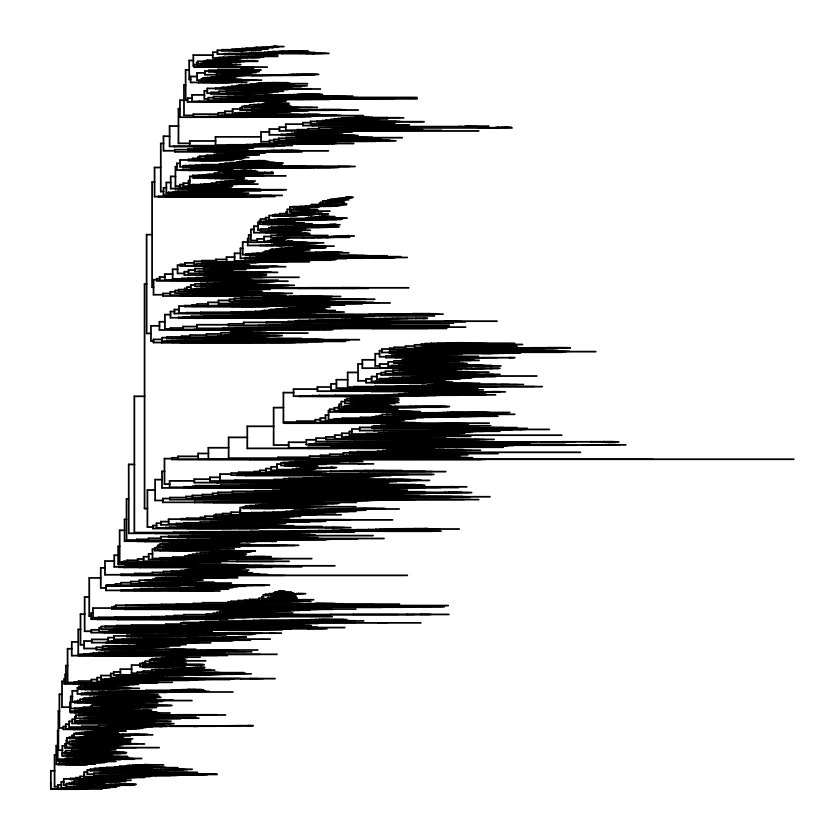

In [81]:
ggplot(all.tre) + geom_tree() + theme_tree()

## Run phylosignal

Phylogeny produced with fasttree and masked alignment

Midpoint root the phylogeny

In [82]:
phy = midpoint.root(ntree)

In [83]:
head(dat.tre)

Accession      flaID genome_size gtdb_genome_representative
1 SNX72910.1     fla1  4511824     RS_GCF_900207585.1        
2 KNY28622.1     fla2  6630821     RS_GCF_001262605.1        
3 KJR47801.1     fla3  5311733     RS_GCF_000960765.1        
4 WP_092074313.1 fla4  4130502     RS_GCF_900104455.1        
5 WP_052504473.1 fla5  4753727     RS_GCF_008180865.1        
6 OME87138.1     fla6  7846829     RS_GCF_001956295.1        
  ncbi_genome_category ncbi_genome_representation ncbi_assembly_level
1 none                 full                       Scaffold           
2 none                 full                       Scaffold           
3 none                 full                       Contig             
4 none                 full                       Scaffold           
5 none                 full                       Contig             
6 none                 full                       Contig             
  ncbi_assembly_name                      ncbi_assembly_type
1 IMG-taxon 2740891863 annotated assembly na                
2 ASM74584v1                              na                
3 ASM96076v1                              na                
4 IMG-taxon 2622736508 annotated assembly na                
5 ASM818081v1                             na                
6 ASM195629v1                             na                
  ncbi_genbank_assembly_accession ⋯ HVR_length ncbi_taxid ncbi_phylum
1 GCA_900207585.1                 ⋯  30        1448271    Firmicutes 
2 GCA_000745845.1                 ⋯ 806         398512    Firmicutes 
3 GCA_000960765.1                 ⋯ 154        1617025    Firmicutes 
4 GCA_900104455.1                 ⋯ 171         146817    Firmicutes 
5 GCA_008180815.1                 ⋯ 126         189382    Firmicutes 
6 GCA_001956295.1                 ⋯ 154        1920420    Firmicutes 
  Domain      Phylum          Class                 Order                  
1 d__Bacteria p__Firmicutes   c__Bacilli            o__Bacillales_B        
2 d__Bacteria p__Firmicutes_A c__Clostridia         o__Acetivibrionales    
3 d__Bacteria p__Firmicutes_B c__Desulfitobacteriia o__Desulfitobacteriales
4 d__Bacteria p__Firmicutes_C c__Negativicutes      o__Selenomonadales_A   
5 d__Bacteria p__Firmicutes   c__Bacilli            o__Bacillales_B        
6 d__Bacteria p__Firmicutes   c__Bacilli            o__Paenibacillales     
  Family                    Genus               
1 f__Caldibacillaceae_A     g__Bacillus_BF      
2 f__Acetivibrionaceae      g__Pseudobacteroides
3 f__Desulfitobacteriaceae  g__Desulfosporosinus
4 f__Dendrosporobacteraceae g__Dendrosporobacter
5 f__Bacillaceae_B          g__Rossellomorea    
6 f__Paenibacillaceae       g__Paenibacillus_C  
  Species                            
1 s__Bacillus_BF oleivorans          
2 s__Pseudobacteroides cellulosolvens
3 s__Desulfosporosinus sp000960765   
4 s__Dendrosporobacter quercicolus   
5 s__Rossellomorea aquimaris_D       
6 s__Paenibacillus_C sp001956295

In [ ]:
flagellin.sizes = write_tsv(dat.tre,"edgeR/flagellin.lengths.taxonomy.tsv")

In [84]:
#Create traits dataframe
traits.length= select(dat.tre,flaID,length,genome_size)

In [85]:
head(traits.length)

flaID length genome_size
1 fla1   270   4511824    
2 fla2  1046   6630821    
3 fla3   394   5311733    
4 fla4   411   4130502    
5 fla5   366   4753727    
6 fla6   394   7846829

##### Create trait list for phylosignal object

In [86]:
#Create trait list for phylosignal object
dat <- list()
dat$length <- traits.length$length
dat$genome_size <- traits.length$genome_size
dat <- as.data.frame(dat)
rownames(dat) = traits.length$flaID
head(dat)

length genome_size
fla1  270   4511824    
fla2 1046   6630821    
fla3  394   5311733    
fla4  411   4130502    
fla5  366   4753727    
fla6  394   7846829

##### Create phylosignal object

In [87]:
#Create phylosignal object
p4d <- phylobase::phylo4d(phy, dat)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’ ‘tidytree’

Warning message in checkTree(object):
“Labels are not unique. ”
Warning message in checkTree(object):
“Labels are not unique. ”


##### Testing phylosignal

In [ ]:
#Test phylosignal hypothesis using Pagel's Lambda method for categorical traits
phylosignal.finalset=phyloSignal(p4d,methods=c("Lambda","Cmean"))
#phylosignal.finalset

In [ ]:
phylosignal.finalset

In [ ]:
hvrlength.crlg <- phyloCorrelogram(p4d, trait = "length")
plot(hvrlength.crlg)

In [ ]:
plot(hvrlength.crlg)

In [ ]:
#flag.lipa <- lipaMoran(p4d)
flag.lipa.p4d <- lipaMoran(p4d, as.p4d = TRUE)

In [ ]:
flag.lipa.p4d

In [ ]:
barplot.phylo4d(flag.lipa.p4d, bar.col=(flag.lipa$p.value < 0.05) + 1, center = FALSE , scale = FALSE,label.type=T)

In [ ]:
library(phylosignal)

In [ ]:
barplot.phylo4d(p4d, tree.type = "phylo", tree.ladderize = TRUE, show.box = TRUE,
                scale = TRUE, tree.ratio = 0.3, col = c("blue", "red"),
                tip.labels = TRUE, cex.lab = 1.5, cex.axis = 1.2,
                main = "Phylogenetic signal of flagellin sequence length")

In [ ]:
barplot.phylo4d(p4d,tree.type = "phylo", tree.ladderize = TRUE,show.box = T,scale=T,tree.ratio = 0.3)

In [ ]:
#phylosim <- phyloSim(tree = phy, method = c("Cmean","Lambda"), nsim = 100, reps = 99)
#phylosim

## Descriptive stats - metadata 

In [ ]:
fla.full.metadata = inner_join(length.seqs,taxonomy.full.db,by="Accession")%>%
separate(gtdb_taxonomy,into=c("gtdb_Domain","gtdb_Phylum","gtdb_Class","gtdb_Order","gtdb_Family","gtdb_Genus","gtdb_Species"),sep=";")

In [ ]:
names(fla.full.metadata)

In [ ]:
hist(order.phyla$n,breaks=50)
abline(v=median(order.phyla$n),col="blue")
abline(v=mean(order.phyla$n),col="blue")

In [ ]:
tmp =filter(order.phyla,n<150)
hist(tmp$n,breaks=50)
abline(v=median(tmp$n),col="blue")
abline(v=mean(tmp$n),col="blue")

In [ ]:
count(fla.full.metadata,ncbi_genbank_assembly_accession)

In [ ]:
#per.genome.count = count(fla.full.metadata,ncbi_genbank_assembly_accession)
stats.per.genome = tibble(nrow(fla.full.metadata),
                          min = min(count(fla.full.metadata,gtdb_genome_representative)$n),
                          max = max(count(fla.full.metadata,gtdb_genome_representative)$n),
                          median = median(count(fla.full.metadata,gtdb_genome_representative)$n),
                          mean = mean(count(fla.full.metadata,gtdb_genome_representative)$n))
stats.per.genome

In [ ]:
hist(count(full.genomes,gtdb_genome_representative)$n,breaks=50)

In [ ]:
full.genomes = filter(fla.full.metadata,ncbi_assembly_level==c("Complete Genome"))

In [ ]:
hist(count(full.genomes,ncbi_genbank_assembly_accession)$n,breaks=50)

In [ ]:
names(full.genomes)

In [ ]:
hist(count(full.genomes,gtdb_Genus)$n,breaks=50)

In [ ]:
phylum.count = count(full.genomes,gtdb_Phylum)

In [ ]:
head(phylum.count)

In [ ]:
hist(phylum.count$n,breaks=50)

In [ ]:
median(phylum.count$n)

In [ ]:
ggplot(data = full.genomes, aes(x=gtdb_Phylum,y=length))+ geom_boxplot()

In [ ]:
stats.full.genome = tibble(nrow(full.genomes),
                          min = min(count(full.genomes,gtdb_Genus)$n),
                          max = max(count(full.genomes,gtdb_Genus)$n),
                          median = median(count(full.genomes,gtdb_Genus)$n),
                          mean = mean(count(full.genomes,gtdb_Genus)$n))
stats.full.genome

In [ ]:
chromosome = filter(fla.full.metadata,ncbi_assembly_level=="Chromosome")

In [ ]:
count.assembly = count(chromosome,ncbi_genbank_assembly_accession)

In [ ]:
filter(count.assembly,n>10)

In [ ]:
filter(fla.full.metadata,ncbi_genbank_assembly_accession=="GCA_002504205.1")%>%
select(c(Accession,gtdb_Genus,gtdb_Species,length,gtdb_genome_representative))

In [ ]:
hist(count(chromosome,ncbi_genbank_assembly_accession)$n,breaks=50)
hist(count(chromosome,gtdb_Species)$n,breaks=50)